In [235]:
from manim import *
import numpy as np
import re
from manim.utils.color import rgb_to_color

class  G :
    ayanas = [ "उत्तरायणम् \u2192" ,  '\u2190 दक्षिणायनम्' ]
    ayanas_u = [ "उत्तरायणम् \u2192" ,  '' ]
    ayanas_d = [ "" ,  '\u2190 दक्षिणायनम्' ]
    # visuvats = [ "उत्तरायणम् \u2192" , 'Spring Equinox', '\u2190 दक्षिणायनम्' , 'Autumn Equinox' ]
    visuvats = [ 'Spring Equinox', 'Autumn Equinox' ]
    visuvats_se = [ 'Spring Equinox', '' ]
    visuvats_ae = [ '', 'Autumn Equinox' ]  
    rtus = [ ' शिशिरः', 'वसन्तः', 'ग्रीष्मः', 'वर्षा', 'शरद्', 'हेमन्तः' ]
    ertus = ['śiśira', 'vasanta', 'grīṣma',  'varṣā','śarat', 'hemanta', ]
    color_grad = [BLUE, PINK ,GREEN, GOLD, PURPLE, RED]

    naks = [ 
        'अश्विनी', 'भरणी', 'कृत्तिका', 'रोहिणी', 'मृगशीर्षा', 'आर्द्रा', 'पुनर्वसु', # 0-6
        'पुष्यः', 'आश्लेषा', 'मघा', 'पू्.फल्गुनी', 'उ.फल्गुनी', 'हस्तः', 'चित्रा', # 7-13
        'स्वाती', 'विशाखा', 'अनूराधा', 'ज्येष्ठा', 'मूला', 'पू.आषाढा', 'उ.आषाढा', # 14-2|0
        'श्रवणः', 'श्रविष्ठा', 'शतभिषा', 'पू.भाद्रपदा', 'उ.भाद्रपदा', 'रेवती' # 21-26
    ]

    enaks_mag = [
        'Mag', 'PPhl', 'UPhl', 'Has', 'Chi', 'Svā', 'Viś', 'Anú', 
        'Jyeṣ', 'Mūl', 'PAṣā', 'UAṣā', 'Śrvn', 'Śrvṣt', 'Śatab', 'PBhā', 'UBhā', 
        'Rev', 'Aśv', 'Bha', 'Kṛt', 'Roh', 'Mṛg', 'Ārd', 'Pun', 'Puṣ', 'Āśl', 
    ]

    enaks = enaks_mag[13:] + enaks_mag[:13]
    
    parasara_naks =  [ 'श्रविष्ठा' , 'रेवती', 'रोहिणी' , 'मृगशीर्षा' , 'आश्लेषा' , 'हस्तः' , 'चित्रा', 'ज्येष्ठा' ,'श्रवणः'  ]
    # parasara_naks = [ x if x in parasara_naks else '' for x in naks ] 
    parasara_naks = [ x if x in  [ 'श्रविष्ठा' , 'रेवती', 'रोहिणी' , 'मृगशीर्षा' , 'आश्लेषा' , 'हस्तः' , 'चित्रा', 'ज्येष्ठा' ,'श्रवणः'  ]  else '' for x in naks ] 
    pn_pairs = [ (22,26), (26,3), (4,8), (8,12), (13,17), (17,21)]

    # rotate naks by 1 elem
    naks = naks[-5:] + naks[:-5]

    rashis = [ 'मेषः', 'वृषभः', 'मिथुनः', 'कर्कटः', 'सिंहः', 'कन्या', 'तुला', 'वृश्चिकः', 'धनुः', 'मकरः', 'कुम्भः', 'मीनः' ]

    # laukika =  ['वसन्तः', 'चैत्रः', 'वैशाखः', 'ग्रीष्मः', 'ज्येष्ठः', 'आशाढः', 'वर्षा', 'श्रवणः', 'भाद्रपादः', 'शरद्', 'आश्वयुक्', 'कृत्तिका', 'हेमन्तः', 'मार्गशिरा', 'पौश्या', 'शिशिरः', 'माघः', 'फाल्गुनः']
    # vaidika =  ['वसन्तः', 'मधु', 'माधवः', 'ग्रीष्मः', 'शुक्रः', 'शूचिः', 'वर्षा', 'नभः', 'नभस्य', 'शरद्', 'इषः', 'उर्जः', 'हेमन्तः', 'सहसः', 'सहस्या', 'शिशिरः', 'तपः', 'तपस्य' ]
    # rtusvabhava_naks_map = ['वसन्तः', 'रेवती', 'भरणी', 'ग्रीष्मः', 'मृगशिरस्', 'पुनर्वसु', 'वर्षा', 'मघा', 'पूर्वफल्गुनी', 'शरद्', 'चित्रा', 'विशाखे', 'हेमन्तः', 'ज्येष्ठा', 'पूरवाषाढा', 'शिशिरः', 'श्रविष्ठा', 'पूर्वभाद्रपादा']
    # laukika_maasas = [ x for i, x in enumerate(laukika) if i%3 != 0 ]
    # vaidika_maasas = [ x for i, x in enumerate(vaidika) if i%3 != 0 ]
    # rtusvabhava_naks = [ x for i, x in enumerate(rtusvabhava_naks_map) if i%3 != 0 ]

    laukika_maasas = ['चैत्रः', 'वैशाखः', 'ज्येष्ठः', 'आशाढः', 'श्रवणः', 'भाद्रपादः', 'आश्वयुक्', 'कृत्तिका', 'मार्गशिरा', 'पौश्या', 'माघः', 'फाल्गुनः']
    vaidika_maasas = ['मधु', 'माधवः', 'शुक्रः', 'शूचिः', 'नभः', 'नभस्य', 'इषः', 'उर्जः', 'सहसः', 'सहस्या', 'तपः', 'तपस्य' ]
    rtusvabhava_naks = ['रेवती', 'भरणी', 'मृगशीर्षा', 'पुनर्वसु', 'मघा', 'पूर्वफल्गुनी', 'चित्रा', 'विशाखे', 'ज्येष्ठा', 'पूर्वाषाढा', 'श्रविष्ठा', 'पूर्वभाद्रपादा']
                                                                                                                         
    very_light_gray = rgb_to_color(rgb=(0.9, 0.9, 0.9))
    very_very_light_gray = rgb_to_color(rgb=(0.95, 0.95, 0.95))

In [7]:
# Define a class that renders a circle with 27 sectors. Each sector is named on G.naks
class SegmentedRing(VGroup) :
    def __init__(self, elems, 
            radius=5, opacity=.5, inner_radius_factor=.85, stroke_width=.5,
            text_color=BLACK, text_size=45, text_opacity=1, text_padding=.9, text_sector_fraction =.5, text_wiggle=1,
            **kwargs):
        super().__init__(**kwargs)
        self.radius = radius
        self.elems = elems
        n_elems = len(self.elems)
        colors_N = color_gradient(G.color_grad, n_elems) 
        self.items = VGroup()
        for i in range(n_elems):
            sector = Sector(
                start_angle = -i * 2 * PI / n_elems,
                angle = 2 * PI / n_elems,
                outer_radius = self.radius,
                inner_radius = self.radius*inner_radius_factor,
                fill_opacity = opacity,
                stroke_width = stroke_width,
            )#.reverse_points()
            # sector.set_stroke(color = BLACK, width = 0.5, opacity = .25)
            sector.set_color(color = BLACK)
            sector.set_fill(color = colors_N[i-1], opacity = opacity)

            sector_tgt_angle = sector.angle*text_sector_fraction + sector.start_angle
            sector_tgt_angle += 2*PI if sector_tgt_angle < 0 else 0
            sector_mid_point = sector.get_arc_center() 
    
            # pad125 = 1.15*self.radius * np.array([np.cos(sector_tgt_angle), np.sin(sector_tgt_angle), 0]) 
            pad100 = self.radius * np.array([np.cos(sector_tgt_angle), np.sin(sector_tgt_angle), 0]) 

            text = Text(
                f"{self.elems[i]}",
                font_size=text_size, 
                color=text_color,
                fill_opacity=text_opacity
            )
            text.rotate(sector_tgt_angle +  (-PI/2 if (0 < sector_tgt_angle < PI) else PI/2))
            text.move_to(sector_mid_point+pad100*text_padding)
            if ( text_wiggle != 0 ) : Wiggle(text, run_time=0.1, scale_value=1.1, rotation_angle=0.1) 
            
            
            self.items.add(VGroup(sector,text))
        self.add(self.items)

    def get_item(self, idx):
        if 0 <= idx < len(self.items):
            return self.items[idx]
        return None

    def get_item_by_name(self, name):
        for i in range(len(self.items)):
            if name in self.items[i][1].text :
                return self.items[i]
        return None

    def get_items(self):
        return self.items

    def rotate(self, angle, axis = OUT, **kwargs):
        self.items.rotate(angle, axis = axis, **kwargs)
        return self
    
    def rotate_item_by_name(self, name, angle, axis = OUT, **kwargs):
        item = self.get_item_by_name(name)
        if item is not None:
            item.rotate(angle, axis = axis, **kwargs)
        return self

    def rotate_sector_by_name(self, name, angle, axis = OUT, **kwargs):
        item = self.get_item_by_name(name)
        if item is not None:
            item[0].rotate(angle, axis = axis, **kwargs)
        return self
    
    def rotate_text_by_name(self, name, angle, axis = OUT, **kwargs):
        item = self.get_item_by_name(name)
        if item is not None:
            item[1].rotate(angle, axis = axis, **kwargs)
        return self

    def move_text_by_name_to_sector_fraction(self, name, sector_fraction=.5, **kwargs):
        item = self.get_item_by_name(name)
        if item is not None:
            sector = item[0]
            text = item[1]
            tgt_angle = sector.angle*sector_fraction + sector.start_angle
            vector = self.radius * np.array([np.cos(tgt_angle), np.sin(tgt_angle), 0])
            text.move_to(item[1].get_center() + vector, **kwargs)
        return self 

class Celestial(VGroup) :
    def __init__(self,
            orbit_radius=5, orbit_opacity=.5, orbit_color=BLACK, orbit_stroke_width=.5,
            object_radius=.5, object_opacity=1, object_color=BLACK, object_stroke_width=0,
            horizon_tracker = False,
            **kwargs):
        super().__init__(**kwargs)
        self.orbit = Circle( radius=orbit_radius, fill_opacity=orbit_opacity, color=orbit_color, stroke_width=orbit_stroke_width).reverse_points().rotate(PI/2)
        self.object = Circle( radius=object_radius, fill_opacity=object_opacity, color=object_color, stroke_width=object_stroke_width)
        self.object.move_to(self.orbit.get_top())
        self.horizon_tracker = horizon_tracker
        if horizon_tracker:
            self.make_horizon_tracker()
        
    def make_horizon_tracker(self):
        horizon_line = Line(
            start=self.orbit.get_bottom()+ 2*DOWN + LEFT*self.orbit.radius, 
            end=self.orbit.get_bottom()+ 2*DOWN + RIGHT*self.orbit.radius,
            stroke_width=2,
            color=BLACK
        )
        # At  start, mid, and end of horizon_line , write labels N E S respectively
        self.n_text = MarkupText("Ν<sub>23°</sub>", font_size=50, color=BLUE).next_to(horizon_line.get_start(), 0.1*DOWN + 1.5*RIGHT)
        self.e_text = MarkupText("E<sub>0°</sub>", font_size=40, color=BLACK).next_to(horizon_line.get_center(),0.1*DOWN)
        self.s_text = MarkupText("S<sub>23°</sub>", font_size=50, color=PURPLE).next_to(horizon_line.get_end(), 0.1*DOWN + 1.5*LEFT)
        self.h_text = MarkupText("<i>sunrise at horizon</i>", font_size=30, color=GRAY).move_to(horizon_line.get_center() + .55*DOWN)

        horizon_object= Dot(color=self.object.color, radius=self.object.radius*.5, fill_opacity=self.object.fill_opacity, stroke_width=self.object.stroke_width)
        horizon_object.move_to(horizon_line.get_right())

        tracker_orbit = Circle(radius=self.orbit.radius*.95, stroke_width=0).reverse_points().rotate(0*PI/2)
        tracker_object = Dot(color=GRAY, radius=.01)
        tracker_object.move_to(tracker_orbit.get_center() + RIGHT*(tracker_orbit.radius - tracker_object.radius) )
        def tracker_fn(mob):
            mob.move_to(UP*horizon_line.get_right()[1] + .85*RIGHT*(tracker_object.get_center()[0] - tracker_orbit.get_center()[0]))
        horizon_object.add_updater(tracker_fn)

        self.tracker_orbit = tracker_orbit
        self.tracker_object = tracker_object
        self.horizon_line = horizon_line
        self.horizon_object = horizon_object
        self.horizon_elems = VGroup(horizon_line, horizon_object, tracker_orbit, tracker_object, self.n_text, self.e_text, self.s_text, self.h_text)
        self.orbit_elems = VGroup(self.orbit, self.object)
        return self

    def move(self, **kwargs):
        return [
            MoveAlongPath(self.object, self.orbit, **kwargs)
        ]  

    def move_tracker(self, **kwargs):
        return [
        ] + ( [] if not self.horizon_tracker else (
            []
            + self.materialize_trackers(**kwargs) 
            + [ MoveAlongPath(self.tracker_object, self.tracker_orbit, **kwargs) ]  
            ) )

    def move_both(self, **kwargs):
        return self.move(**kwargs) + self.move_tracker(**kwargs)

    def materialize_trackers( self, **kwargs) :
        if hasattr(self, 'tracker_added'): return [] 

        self.tracker_added = True
        if self.horizon_tracker:
            return [ FadeIn(
                self.horizon_line, self.horizon_object, # self.tracker_orbit, self.tracker_object,
                self.n_text, self.e_text, self.s_text, self.h_text, 
                self.object, self.orbit,
                **kwargs
            ) ]
        
def pause_at_midpoint(t):
    if t < 0.5:
        return 0.5 * smooth(t / 0.5)
    else:
        return 0.5 + 0.5 * smooth((t - 0.5) / 0.5)

def pause_at_quarters(t):
    if t < 0.25:
        return 0.25 * smooth(t / 0.25)
    elif t < 0.5:
        return 0.25 + 0.25 * smooth((t - 0.25) / 0.25)
    elif t < 0.75:
        return 0.5 + 0.25 * smooth((t - 0.5) / 0.25)
    else:
        return 0.75 + 0.25 * smooth((t - 0.75) / 0.25)

def stop_at_midpoint(t): 
    return pause_at_midpoint(t/2)

def start_from_midpoint(t):
    ans = .5 + pause_at_midpoint(t/2) 
    return ans

def pause_at_quarters_first_half(t):
    return pause_at_quarters(t/2)

def pause_at_quarters_second_half(t):
    return .5 + pause_at_quarters(t/2)

def pause_at_sixths(t):
    if t < 1/6:
        return 1/6 * smooth(t / (1/6))
    elif t < 2/6:
        return 1/6 + 1/6 * smooth((t - 1/6) / (1/6))
    elif t < 3/6:
        return 2/6 + 1/6 * smooth((t - 2/6) / (1/6))
    elif t < 4/6:
        return 3/6 + 1/6 * smooth((t - 3/6) / (1/6))
    elif t < 5/6:
        return 4/6 + 1/6 * smooth((t - 4/6) / (1/6))
    else:
        return 5/6 + 1/6 * smooth((t - 5/6) / (1/6))


In [8]:
%%manim -v WARNING --disable_caching -ql -r 700,850 -o 01_SunTransitBasicsMovie SunTransitBasics 

class SunTransitBasics(Scene) :
    def construct(self) :
        self.camera.background_color = WHITE
        (ayanas, ayanas_u, ayanas_d, visuvats, visuvats_se, visuvats_ae, rtus, naks_shell, naks_text, rashis) =  ( 
            SegmentedRing(elems=G.ayanas     , radius=4-4+5.5, opacity=.02, inner_radius_factor=.89, text_size=30, text_padding=.95, text_color=DARK_BLUE, text_opacity=1, text_sector_fraction=.92), 
            SegmentedRing(elems=G.ayanas_u   , radius=4-4+5.5, opacity=.02, inner_radius_factor=.89, text_size=30, text_padding=.95, text_color=DARK_BLUE, text_opacity=1, text_sector_fraction=.92), 
            SegmentedRing(elems=G.ayanas_d   , radius=4-4+5.5, opacity=.02, inner_radius_factor=.89, text_size=30, text_padding=.95, text_color=DARK_BLUE, text_opacity=1, text_sector_fraction=.92), 
            SegmentedRing(elems=G.visuvats   , radius=4-4+5.5, opacity=.02, inner_radius_factor=.89, text_size=30, text_padding=.95, text_color=DARK_BROWN, text_opacity=1, text_sector_fraction=1, text_wiggle=1), 
            SegmentedRing(elems=G.visuvats_se, radius=4-4+5.5, opacity=.02, inner_radius_factor=.89, text_size=30, text_padding=.95, text_color=DARK_BROWN, text_opacity=1, text_sector_fraction=1, text_wiggle=1), 
            SegmentedRing(elems=G.visuvats_ae, radius=4-4+5.5, opacity=.02, inner_radius_factor=.89, text_size=30, text_padding=.95, text_color=DARK_BROWN, text_opacity=1, text_sector_fraction=1, text_wiggle=1), 
            SegmentedRing(elems=G.rtus, radius=4.8, opacity=.2, inner_radius_factor=.85, text_size=35, text_padding=.92), 
            SegmentedRing(elems=['' for x in G.naks], radius=6.2 , opacity=.2, inner_radius_factor=.9, text_size=25, text_padding=.95, stroke_width=0),
            SegmentedRing(elems=G.naks, radius=6.2 , opacity=0, inner_radius_factor=.9, text_size=25, text_padding=.95),
            SegmentedRing(elems=G.rashis, radius=7 , opacity=.2, inner_radius_factor=.9, text_size=25, text_padding=.95)
        )
        rtus.rotate(PI/6)
        naks_shell.rotate(PI/6)
        naks_text.rotate(PI/6)
        ayanas.rotate(-PI/2)
        ayanas_u.rotate(-PI/2)
        ayanas_d.rotate(-PI/2)
        visuvats.rotate(PI)
        visuvats_se.rotate(PI)
        visuvats_ae.rotate(PI)

        sun = Celestial(
            orbit_radius=5.2, orbit_opacity=.12, orbit_color=WHITE, orbit_stroke_width=.25, 
            object_radius=.5, object_opacity=.5, object_color=ORANGE, object_stroke_width=0,
            horizon_tracker=True
            )
        sun.orbit_elems.shift(UP*15)
        sun.horizon_elems.shift(UP*6)
        sun.horizon_elems.scale(1.25)

        # moon = Celestial(orbit_radius=7, orbit_opacity=.2, orbit_color=BLUE, orbit_stroke_width=.5, object_radius=.5, object_opacity=1, object_color=WHITE, object_stroke_width=0)

        DURATION = 8/4
        WAIT_DURATION = 2/10
        t1,t2,t3,wt1 = None,None,None,None
        
        self.add(tx1:=MarkupText(f"The Sun's Transit", font_size=60, color=DARK_BLUE).shift(UP*1))
        self.add(tx2:=MarkupText(f"through the", font_size=40, color=DARK_BLUE).shift(UP*0))
        self.add(tx3:=MarkupText(f"Seasons and Nakṣatras", font_size=60, color=DARK_BLUE).shift(UP*-1))
        self.wait(2)
        # self.remove(t1)
        # self.remove(t2)
        # self.remove(t3)

        def do_rotate_naks_text():
            for i in range(4*2):
                self.play(naks_text.animate.rotate(PI/27/2), run_time=1)

        def do_summarize():
            text = Text("""
                The Sun Transits through 
                6 Seasons and 
                27 Nakṣatras in one year

                Seasonal Nakṣatras, 
                drift slowly over millenia

                This drift helps 
                date ancient texts and events.

                ***** ***** ***** 

                """, font_size=30, color=BLACK, line_spacing=.5,
                t2c={
                    "Sun Transits": BLUE,
                    "6 Seasons": GREEN,
                    "27 Nakṣatras": RED,
                    "Seasonal Nakṣatras": BLUE, 
                    "drift": GREEN,
                    "millenia": RED,
                    "date ancient": BLUE,
                    },
                t2f={"Sun": "bold", "6": "bold", "27": "bold", "Seasonal": "bold", "drift": "bold", "millenia": "bold", "date": "bold"}
                )
            self.play(Write(text), run_time=20)

        elems = [
            [
                Transform(tx1,MarkupText(f"The Sun's Transit", font_size=50*0, color=DARK_BLUE).shift(UP*1)),
                Transform(tx2,MarkupText(f"through the", font_size=30*0, color=DARK_BLUE).shift(UP*0)),
                Transform(tx3,MarkupText(f"Seasons and Nakṣatras", font_size=50*0, color=DARK_BLUE).shift(UP*-1)),
            ],
            [
                Write(t1:= MarkupText(f"<big><b>Sunrise swings</b></big>", font_size=60, color=DARK_BLUE).shift(UP*1)),
                Write(t2:= MarkupText(f"over one year", font_size=30, color=DARK_BLUE).shift(UP*0)),
                Write(t3:= MarkupText(f"around <big><b>East</b></big>", font_size=60, color=DARK_BLUE).shift(UP*-1)),
                Wait(WAIT_DURATION)
            ],
            [
                *sun.move_tracker(run_time=5, rate_func=linear),
                 Wait(WAIT_DURATION)
            ],
            [
                ApplyWave(t1),
                ApplyWave(t3),
                *sun.move_tracker(run_time=5, rate_func=linear),
                Wait(WAIT_DURATION)
            ],
            [
                sun.horizon_elems.animate.scale(.8),
                sun.horizon_elems.animate.shift(-UP*5),
                sun.orbit_elems.animate.shift(-UP*15)
            ],
            [
                Transform(t1, MarkupText(f"The <big><b>Sun</b></big> completes", font_size=50, color=DARK_BLUE).shift(UP*1)),
                Transform(t2, MarkupText(f"one cycle through the", font_size=30, color=DARK_BLUE).shift(UP*0)),
                Transform(t3, MarkupText(f"<big><b>6 seasons in one year</b></big>", font_size=50, color=DARK_BLUE).shift(UP*-1)),
                Wait(WAIT_DURATION)
            ],
            [
                *sun.move(run_time=DURATION, rate_func=linear) ,  
                Create(rtus, run_time=DURATION),
                Wait(WAIT_DURATION)
            ],
            [
                ApplyWave(t1),
                ApplyWave(t3),
                *sun.move(run_time=DURATION, rate_func=linear) ,  
                Wait(WAIT_DURATION)
            ],
            [
                *sun.move_both(run_time=DURATION, rate_func=linear) ,  
                Wait(WAIT_DURATION)
            ],
            [
                Transform(t1, MarkupText(f"The first half is <big><b>uttarāyaṇa</b></big>", font_size=40, color=DARK_BLUE).shift(UP*1)),
                Transform(t2, MarkupText(f"", font_size=30, color=DARK_BLUE).shift(UP*0)),
                Transform(t3, MarkupText(f"", font_size=50, color=DARK_BLUE).shift(UP*-1)),
                *sun.move_both(run_time=DURATION, rate_func=stop_at_midpoint ) ,
                Wait(WAIT_DURATION)
            ],
            [
                Transform(t3, MarkupText(f"the second half <big><b>dakṣhiṇāyana</b></big>", font_size=40, color=DARK_BLUE).shift(UP*-1)),
                *sun.move_both(run_time=DURATION, rate_func=start_from_midpoint) ,
                Wait(WAIT_DURATION)
            ],
            [
                ApplyWave(t1),
                Create(ayanas_u, run_time=DURATION), 
                *sun.move_both(run_time=DURATION, rate_func=stop_at_midpoint ) ,
                Wait(WAIT_DURATION)
            ],
            [
                ApplyWave(t3),
                Create(ayanas_d, run_time=DURATION), 
                *sun.move_both(run_time=DURATION, rate_func=start_from_midpoint ) ,
                Wait(WAIT_DURATION)
            ],
            [
                Transform(t1, MarkupText(f"<big><b>Spring Equinox</b></big> mid-uttarāyaṇa", font_size=33, color=DARK_BLUE).shift(UP*1)),
                Transform(t2, MarkupText(f"equal day and night ", font_size=30, color=GRAY).shift(UP*0)),
                Transform(t3, MarkupText(f"", font_size=50, color=DARK_BLUE).shift(UP*-1)),
                Create(visuvats_se, run_time=DURATION),
                *sun.move_both(run_time=DURATION, rate_func=pause_at_quarters_first_half ) ,
                Wait(WAIT_DURATION)
            ],
            [
                Transform(t3, MarkupText(f"<big><b>Autumn Equinox</b></big> mid-dakṣhiṇāyana", font_size=33, color=DARK_BLUE).shift(UP*-1)),
                Create(visuvats_ae, run_time=DURATION),
                *sun.move_both(run_time=DURATION, rate_func=pause_at_quarters_second_half ) ,
                Wait(WAIT_DURATION)
            ],
            [
                *sun.move_both(run_time=DURATION, rate_func=pause_at_quarters ) ,
                Wait(WAIT_DURATION)
            ],

            [
                Transform(t1, MarkupText(f"The <big><b>Sun</b></big> transits", font_size=50, color=DARK_BLUE).shift(UP*1)),
                Transform(t2, MarkupText(f"in one year, through the", font_size=30, color=DARK_BLUE).shift(UP*0)),
                Transform(t3, MarkupText(f"<big><b>27 nakṣatras</b></big>", font_size=50, color=DARK_BLUE).shift(UP*-1)),
            ],
            [
                ns := Create(naks_shell , run_time=4*DURATION), 
                nt := Create(naks_text , run_time=4*DURATION),
                *sun.move_both(run_time=4*DURATION, rate_func=linear) ,  
                Wait(WAIT_DURATION)
            ],
            [
                ApplyWave(t3),
                *sun.move_both(run_time=DURATION, rate_func=linear) ,  
                Wait(WAIT_DURATION)
            ],
            [
                Transform(t1, MarkupText(f"<big><b>Seasonal Nakṣatras</b></big> ", font_size=50, color=DARK_BLUE).shift(UP*1)),
                Transform(t2, MarkupText(f"for each season spans", font_size=30, color=DARK_BLUE).shift(UP*0)),
                Transform(t3, MarkupText(f"<big><b>4½ nakṣatras</b></big>", font_size=50, color=DARK_BLUE).shift(UP*-1)),
                *sun.move_both(run_time=4*DURATION, rate_func=pause_at_sixths) ,
            ],
            [
                ApplyWave(t1),
                ApplyWave(t3),
                *sun.move_both(run_time=4*DURATION, rate_func=pause_at_sixths) ,
                Wait(WAIT_DURATION)
            ],
            [
                Transform(t1, MarkupText(f"<big><b>Seasonal Nakṣatras</b></big> ", font_size=40, color=DARK_BLUE).shift(UP*1)),
                Transform(t2, MarkupText(f"are not fixed, they", font_size=30, color=DARK_BLUE).shift(UP*0)),
                Transform(t3, MarkupText(f"<big><b>drift slowly over millenia</b></big>", font_size=40, color=DARK_BLUE).shift(UP*-1)),
                *sun.move_both(run_time=4*DURATION, rate_func=linear) ,
            ],
            do_rotate_naks_text,
            [
                Transform(t1, MarkupText(f"", font_size=40, color=DARK_BLUE).shift(UP*1)),
                Transform(t2, MarkupText(f"", font_size=30, color=DARK_BLUE).shift(UP*0)),
                Transform(t3, MarkupText(f"", font_size=40, color=DARK_BLUE).shift(UP*-1)),
            ],
            do_summarize,
            


            # *[
            #     [
            #         Transform(t1,Text("").shift(UP*2)),
            #         Transform(t2,Text(f"Changing Seasonal nakṣatras\n", font_size=40, color=DARK_BLUE).shift(UP*1)),
            #         Transform(t3,Text("after").shift(UP*0)),
            #         Transform(wt1,Text("").shift(DOWN)),
            #         ApplyWave(wt1:=Text(f"after {x} years", font_size=40, color=DARK_BLUE).shift(DOWN*1)),
            #         sun.move(run_time=DURATION, rate_func=pause_at_midpoint),
            #         Wait(2)
            #     ] for x in range(0,5001,1000)   
            # ],
            # [
            #     Transform(t1,Text("").shift(UP*3)),
            #     Transform(t2,Text("").shift(UP*3)),
            #     Transform(t3,Text("").shift(UP*3)),
            #     Transform(wt1,Text("").shift(UP*3)),
            # ]
        ]

        for e in elems :
            if type(e) == list: 
                self.play(*e)
            else:
                e()
        
        self.wait(1)


In [237]:
%%manim -v WARNING --disable_caching -ql -r 700,850 -o 02_PrecessionMovie PrecessionMandala

class PrecessionMandala(Scene) :
    def construct(self):
        self.camera.background_color = rgb_to_color([0, 0, 0])
        self.camera.background_color = WHITE
        (ayanas, ayanas_u, ayanas_d, visuvats, visuvats_se, visuvats_ae, rtus, naks_shell, naks_text, rashis) =  ( 
            SegmentedRing(elems=G.ayanas     , radius=4-4+5.5, opacity=.02, inner_radius_factor=.89, text_size=30, text_padding=.95, text_color=DARK_BLUE, text_opacity=1, text_sector_fraction=.92), 
            SegmentedRing(elems=G.ayanas_u   , radius=4-4+5.5, opacity=.02, inner_radius_factor=.89, text_size=30, text_padding=.95, text_color=DARK_BLUE, text_opacity=1, text_sector_fraction=.92), 
            SegmentedRing(elems=G.ayanas_d   , radius=4-4+5.5, opacity=.02, inner_radius_factor=.89, text_size=30, text_padding=.95, text_color=DARK_BLUE, text_opacity=1, text_sector_fraction=.92), 
            SegmentedRing(elems=G.visuvats   , radius=4-4+5.5, opacity=.02, inner_radius_factor=.89, text_size=30, text_padding=.95, text_color=DARK_BROWN, text_opacity=1, text_sector_fraction=1, text_wiggle=1), 
            SegmentedRing(elems=G.visuvats_se, radius=4-4+5.5, opacity=.02, inner_radius_factor=.89, text_size=30, text_padding=.95, text_color=DARK_BROWN, text_opacity=1, text_sector_fraction=1, text_wiggle=1), 
            SegmentedRing(elems=G.visuvats_ae, radius=4-4+5.5, opacity=.02, inner_radius_factor=.89, text_size=30, text_padding=.95, text_color=DARK_BROWN, text_opacity=1, text_sector_fraction=1, text_wiggle=1), 
            SegmentedRing(elems=G.rtus, radius=4.8, opacity=.2, inner_radius_factor=.85, text_size=35, text_padding=.92), 
            SegmentedRing(elems=['' for x in G.naks], radius=6.2 , opacity=.2, inner_radius_factor=.9, text_size=25, text_padding=.95, stroke_width=0),
            SegmentedRing(elems=G.naks, radius=6.2 , opacity=0, inner_radius_factor=.9, text_size=25, text_padding=.95),
            SegmentedRing(elems=G.rashis, radius=7 , opacity=.2, inner_radius_factor=.9, text_size=25, text_padding=.95)
        )
        rtus.rotate(PI/6)
        naks_shell.rotate(PI/6)
        naks_text.rotate(PI/6)
        ayanas.rotate(-PI/2)
        ayanas_u.rotate(-PI/2)
        ayanas_d.rotate(-PI/2)
        visuvats.rotate(PI)
        visuvats_se.rotate(PI)
        visuvats_ae.rotate(PI)
        yr = 2000



        precession_label = Text(
        """
           Drift of the
        Seasonal Nakṣatras
        """, font_size=70, color=GRAY, font="Monospace", t2c={'Drift': RED, 'Seasonal Nakṣatras': BLUE})
        epoch_label = MarkupText(f"", font_size=60, color=BLACK).shift(UP*0)
        epoch_yr = MarkupText(f"", font_size=60, color=BLACK).shift(DOWN*1)
        epoch_desc = MarkupText(f"", font_size=40, color=BLACK).shift(DOWN*2)
        (ut_m, se_m, dk_m, ae_m) = ( Dot(color=c, radius=1, fill_opacity=.3).shift(x*naks_shell.radius*.95) for x,c in [
            (UP,RED), (RIGHT, BLUE), (DOWN, PINK), (LEFT, GREEN)])

        self.play(precession_label.animate.shift(UP*2.5).scale(.58), run_time=2)
        for x in [ayanas, rtus, visuvats] : self.play(FadeIn(x, run_time=1)) 
        # self.play(FadeIn(ut_m, se_m, dk_m, ae_m))
        self.play(FadeIn(epoch_label, epoch_yr, epoch_desc, run_time=1))
        self.play(FadeIn(naks_shell, naks_text, run_time=3))
        self.play(ApplyWave(precession_label, amplitude=0.5, run_time=2))
        for x in [ut_m, se_m, dk_m, ae_m] : self.play(FadeIn(x, run_time=1), x.animate.scale(.5)) 
        Wait(2)

        # create a horizon line below the naks_shell
        horizon_line = Line(
            start=naks_shell.get_bottom()+ 1.0*DOWN + LEFT*naks_shell.radius, 
            end=naks_shell.get_bottom()+ 1.0*DOWN + RIGHT*naks_shell.radius,
            stroke_width=2,
            color=BLACK
        )
        # Let the left end be -2000 and right end be 2000
        # place ticks at -2000, -1000, 0, 1000, 2000
        ticks = [ Line(
            start=horizon_line.get_center() + .1*DOWN + RIGHT*x*naks_shell.radius,
            end=horizon_line.get_center() - .1*DOWN + RIGHT*x*naks_shell.radius, 
            stroke_width=2, color=BLACK) for x in [-1, -.5, 0, .5, 1] 
        ]
        tick_labels = [ 
            MarkupText(f"{abs(x)} BCE" if x < 0 else f"{x} CE",
                       font_size=25, color=GREEN if x<0 else BLUE).next_to(ticks[i], .5*DOWN) 
                       for i,x in enumerate([-2000, -1000, 0, 1000, 2000]) 
        ]
        self.play(FadeIn(horizon_line, *ticks, *tick_labels, run_time=1))

        # create a pink dot at the right end of the horizon line
        horizon_object= Dot(color=RED, radius=.2, fill_opacity=1, stroke_width=0)
        horizon_object.move_to(horizon_line.get_right())
        self.play(FadeIn(horizon_object, run_time=1))

        epochs = [
            ( 2000 ,  'Current Epoch', ''  ),
            ( 1500 ,  '500 years ago',              ''),
            ( 1000 ,  '1000 years ago',  '' ),
            (  500 ,  'आर्यभटः',        '' ),
            (  500 ,  'वराहमिहिरः',      '' ),
            ( -500 ,  'ऋतुस्वभावः VGJ:59',    '12 seasonal nakṣatras'   ),
            (-1300 ,  'लगधः',       '1 seasonal nakṣatra, 1 new moon'  ),
            (-1300 ,  'पराशरतन्त्रम्',     '9 seasonal nakṣatras'  ),
            (-1300 ,  'आदित्यचारः VGJ:11',    '9 seasonal nakṣatras'    ),
            (-1800 ,  'ब्रह्माण्डपुराणम् 21.143..',   '4 seasonal nakṣatras, 2 full moons'   ),
        ]

        init_year = prev_yr = 2001
        for  yr, label, desc in (epochs[:-1] + epochs[::-1]) :
            rot_radians = -(yr-init_year)*2*PI/25500
            rot_idx = 27*rot_radians/(2*PI)
            (u, s, d, a) = [ round(rot_idx - 4 - 27*i/4)%27 for i in [0, 1, 2, 3]]
            (ut, se, dk, ae) = [naks_text.elems[x] for x in [u, s, d, a]]

            self.play(
                naks_text.animate.rotate(-(yr-prev_yr)*2*PI/25500),
                Transform(epoch_label, MarkupText(f"{label}", font_size=60, color=BLUE).shift(UP*0), run_time=1),
                Transform(epoch_yr, MarkupText(f"<b>{abs(yr):5d} {' BCE' if yr<0 else ' CE'}</b>", font_size=60, color=BLACK).shift(DOWN*1), run_time=1),
                Transform(epoch_desc, MarkupText(f"{desc}", font_size=35, color=GRAY).shift(DOWN*2), run_time=1),
                # ApplyWave(epoch_yr, amplitude=0.5, run_time=1 if prev_yr != yr else 0),
                horizon_object.animate.move_to(horizon_line.get_right() + RIGHT*(yr-init_year)*horizon_line.get_length()/4000),
            )
            # for x in [ut_m, se_m, dk_m, ae_m] : self.play(Indicate(x, run_time=.5)) 
            self.play( Indicate(horizon_object, amplitude=1, run_time=.5),)
            self.play( Wait(5))
            prev_yr = yr

        # for i in range(10):
        #     yr = yr + 500
        #     self.play(
        #         naks_text.animate.rotate(PI/27), 
        #         Transform(epoch_yr, MarkupText(f"{(yr-i*500):5d}", font_size=60, color=BLACK)),
        #         run_time=1
        #     )
        Wait(2)
    


In [238]:
%%manim -v WARNING --disable_caching -ql -r 700,850 -o 03_RtusvabhavaMovie RtusvabhavaMandala
#Ṛtusvabhāva

class RtusvabhavaMandala(Scene) :
    def construct(self):
        self.camera.background_color = rgb_to_color([0, 0, 0])
        self.camera.background_color = WHITE
        (ayanas, ayanas_u, ayanas_d, visuvats, visuvats_se, visuvats_ae, rtus, naks_shell, naks_text, rashis) =  ( 
            SegmentedRing(elems=G.ayanas     , radius=4-4+5.5, opacity=.02, inner_radius_factor=.89, text_size=30, text_padding=.95, text_color=DARK_BLUE, text_opacity=1, text_sector_fraction=.92), 
            SegmentedRing(elems=G.ayanas_u   , radius=4-4+5.5, opacity=.02, inner_radius_factor=.89, text_size=30, text_padding=.95, text_color=DARK_BLUE, text_opacity=1, text_sector_fraction=.92), 
            SegmentedRing(elems=G.ayanas_d   , radius=4-4+5.5, opacity=.02, inner_radius_factor=.89, text_size=30, text_padding=.95, text_color=DARK_BLUE, text_opacity=1, text_sector_fraction=.92), 
            SegmentedRing(elems=G.visuvats   , radius=4-4+5.5, opacity=.02, inner_radius_factor=.89, text_size=30, text_padding=.95, text_color=DARK_BROWN, text_opacity=1, text_sector_fraction=1, text_wiggle=1), 
            SegmentedRing(elems=G.visuvats_se, radius=4-4+5.5, opacity=.02, inner_radius_factor=.89, text_size=30, text_padding=.95, text_color=DARK_BROWN, text_opacity=1, text_sector_fraction=1, text_wiggle=1), 
            SegmentedRing(elems=G.visuvats_ae, radius=4-4+5.5, opacity=.02, inner_radius_factor=.89, text_size=30, text_padding=.95, text_color=DARK_BROWN, text_opacity=1, text_sector_fraction=1, text_wiggle=1), 
            SegmentedRing(elems=G.rtus, radius=4.8, opacity=.2, inner_radius_factor=.85, text_size=35, text_padding=.92), 
            SegmentedRing(elems=['' for x in G.naks], radius=6.2 , opacity=.2, inner_radius_factor=.9, text_size=25, text_padding=.95, stroke_width=0),
            SegmentedRing(elems=G.naks, radius=6.2 , opacity=0, inner_radius_factor=.9, text_size=25, text_padding=.95),
            SegmentedRing(elems=G.rashis, radius=7 , opacity=.2, inner_radius_factor=.9, text_size=25, text_padding=.95)
        )
        rtus.rotate(PI/6)
        naks_shell.rotate(PI/6)
        naks_text.rotate(PI/6)
        ayanas.rotate(-PI/2)
        ayanas_u.rotate(-PI/2)
        ayanas_d.rotate(-PI/2)
        visuvats.rotate(PI)
        visuvats_se.rotate(PI)
        visuvats_ae.rotate(PI)
        yr = 2000
        

        colors_N = color_gradient(G.color_grad, 19) 
        rtusvabhava_naks_text = SegmentedRing(
            elems=G.rtusvabhava_naks, radius=rtus.radius , opacity=0.05, text_color=MAROON,
            inner_radius_factor=.85, text_size=25, text_padding=.95, stroke_width=0).rotate(-2*PI/180)
        
        t2w_title = {x:BOLD for x in [
            "पराशरतन्त्रम्", "Ādityacāra", "Parāśaratantra", "Seasonal Nakṣatras",
            "आदित्यचारः", "Vṛddha-Gārgīya Jyotiṣa", "Epoch", "वृद्धगार्गीयज्योतिषम्",
            "Ṛtusvabhāva", "ऋतुस्वभावः"
        ]}

        t2c_title = {
            'पराशरतन्त्रम्': PURPLE, 'Parāśaratantra': PURPLE,
            'Ādityacāra' : RED, 'अदित्यचारः' : PURPLE,
            "Vṛddha-Gārgīya Jyotiṣa": PURPLE, "वृद्धगार्गीयज्योतिषम्": PURPLE,
            "Ṛtusvabhāva": GREEN, "ऋतुस्वभावः": GREEN
        }

        topic_title = VGroup(*[Text(
            x.strip() , font_size=50, color=GRAY, t2c=t2c_title, t2w=t2w_title) 
            for x in
                """
                Epoch of Ṛtusvabhāva passages in
                Vṛddha-Gārgīya Jyotiṣa
                using 12 Seasonal Nakṣatras
                """.split("\n") if x.strip() != '' ]).arrange(DOWN, buff=.25, center=True)
        self.play(topic_title.animate.shift(UP*6.5), run_time=1)


        proxy_sloka = """
                        ऋतुस्वभावः (वृद्धगार्गीयज्योतिषे उपाङ्गः 59)
                        वसन्तः (मधु माधवः) (चैत्रः वैशाखः) (रेवती भरणी)
                        ग्रीष्मः (शुक्रः शूचिः) (ज्येष्ठः आशाढः)(मृगशिरस् पुनर्वसु)
                        वर्षा (नभः नभस्य) (श्रवणः भाद्रपादः ) (मघा पूर्वफल्गुनी्)
                        शरद् (इषः उर्जः) (आश्वयुक् कृत्तिका) (चित्रा विशाखे)
                        हेमन्तः (सहसः सहस्या) (मार्गशिरा पौश्या) (ज्येष्ठा पूर्वाषाढा)
                        शिशिरः (तपः तपस्य) (माघः फाल्गुनः) (श्रविष्ठा पूर्वभाद्रपादा)
                        """
        words = [ y
            for i,x in enumerate (proxy_sloka.split("\n")) if x.strip() != '' 
            for  y in re.split("\s+|\(|\)", x) if y.strip() != ''
        ]
        vaidika = [ words[y+1] for x in range(6) for y in [ 7*x, 7*x+1, 7*x+2]]
        laukika = [ words[y+1] for x in range(6) for y in [ 7*x, 7*x+1+2, 7*x+2+2]]
        naks = [ words[y+1] for x in range(6) for y in [ 7*x, 7*x+1+4, 7*x+2+4]]

        t2c_laukika = { x:colors_N[i] for i,x in enumerate(laukika) } 
        t2c_vaidika = { x:colors_N[i] for i,x in enumerate(vaidika) }
        t2c_naks = { x:colors_N[i] for i,x in enumerate(naks) }
        t2w_laukika = {x:BOLD for x in laukika }
        t2w_vaidika = {x:BOLD for x in vaidika }
        t2w_naks = {x:BOLD for x in naks }
        
        rtusvabhava_shloka = VGroup(*[Text(
            x, font_size=50, color=BLACK, line_spacing=.5, 
            t2c={ **t2c_laukika, **t2c_vaidika, **t2c_naks},
            t2w={ **t2w_laukika, **t2w_vaidika, **t2w_naks, **t2w_title},
            t2f={ 'पराशरतन्त्रम्': "Consolas", 'आदित्यचारः': "Consolas", "वृद्धगार्गीयज्योतिषम्" : "Consolas", 'ऋतुस्वभावः': "Consolas"}
        ) for x in proxy_sloka.split("\n") if x.strip() != '' ]
        ).arrange(DOWN, buff=.2, center=True).scale(.9).shift(DOWN*1)
        # ).arrange(DOWN, buff=.2, center=True).scale(.45).shift(UP*.4)

        rtusvabhava_shloka[0].scale(1.2) # title ऋतुस्वभावः

        self.play(FadeIn(rtusvabhava_shloka), run_time=2)
        self.play(Wait(5))
        self.play(rtusvabhava_shloka.animate.scale(.5).shift(UP*1.4), run_time=2)

        epoch_label = MarkupText(f"", font_size=60, color=BLACK).shift(UP*0)
        epoch_yr = MarkupText(f"", font_size=60, color=BLACK).shift(DOWN*1)
        epoch_desc = MarkupText(f"", font_size=40, color=BLACK).shift(DOWN*2)
        (ut_m, se_m, dk_m, ae_m) = ( Dot(color=c, radius=.01, fill_opacity=.3).shift(x*naks_shell.radius*.95) for x,c in [
            (UP,RED), (RIGHT, BLUE), (DOWN, PINK), (LEFT, GREEN)])
        self.play ( 
           topic_title.animate.scale(.7).shift(UP*1.1),
            FadeIn (ayanas, rtus, visuvats, 
                  epoch_label, epoch_yr, epoch_desc, 
                  naks_shell, naks_text, rtusvabhava_naks_text,
                  ut_m, se_m, dk_m, ae_m),
            run_time=2
        )
        self.play(*[i[1].animate.scale(.7) for i in rtus.get_items()])
        self.play(Wait(5)) 

        rtu_items = rtus.get_items()
        rtu_sectors = [rtu_items[i] for i in [0, 1, 2, 3, 4, 5]]
        rs_items = rtusvabhava_naks_text.get_items()
        for i, (r_sloka, sector) in enumerate(zip(rtusvabhava_shloka[1:]  , rtu_sectors[1:] + rtu_sectors[:1] )) :
            lo = 2*i
            hi = 2*i+1
            r_s = r_sloka.copy()

            self.play(
                r_s.animate.rotate(-(i+1.5)*PI/3), 
                run_time=.5
            )
            self.play(
                r_s.animate.scale(.9).move_to(sector.get_center()*1.1),
                run_time=1
            )   
            self.play(
                FadeOut(r_s),
                rs_items[lo][1].animate.scale(1.2),
                rs_items[hi][1].animate.scale(1.2),
                run_time=1
            )
            self.play(
                ApplyWave(rs_items[lo][1], amplitude=0.5, run_time=1),
                ApplyWave(rs_items[hi][1], amplitude=0.5, run_time=1),
                run_time=1
            )

        self.play(rtusvabhava_shloka.animate.shift(UP*1.5).scale(.9), run_time=2)
        self.play(Indicate(rtusvabhava_naks_text, run_time=2, scale_factor=1, color=RED, rate_func=there_and_back))

       # create a horizon line below the naks_shell
        horizon_line = Line(
            start=naks_shell.get_bottom()+ 1.0*DOWN + LEFT*naks_shell.radius, 
            end=naks_shell.get_bottom()+ 1.0*DOWN + RIGHT*naks_shell.radius,
            stroke_width=2,
            color=BLACK
        )
        # Let the left end be -2000 and right end be 2000
        # place ticks at -2000, -1000, 0, 1000, 2000
        ticks = [ Line(
            start=horizon_line.get_center() + .1*DOWN + RIGHT*x*naks_shell.radius,
            end=horizon_line.get_center() - .1*DOWN + RIGHT*x*naks_shell.radius, 
            stroke_width=2, color=BLACK) for x in [-1, -.5, 0, .5, 1] 
        ]
        tick_labels = [ 
            MarkupText(f"{abs(x)} BCE" if x < 0 else f"{x} CE",
                       font_size=25, color=GREEN if x<0 else BLUE).next_to(ticks[i], .5*DOWN) 
                       for i,x in enumerate([-2000, -1000, 0, 1000, 2000]) 
        ]
        self.add(horizon_line, *ticks, *tick_labels)


        # create a pink dot at the right end of the horizon line
        horizon_object= Dot(color=RED, radius=.2, fill_opacity=1, stroke_width=0)
        horizon_object.move_to(horizon_line.get_right())
        self.add(horizon_object)


        epochs = [
            ( 2000 ,  'Current Epoch',   'Too Distant', ),
            ( 1500 ,  '500 years ago',   'Too Distant', ),
            ( 1000 ,  '1000 years ago',  'Too Distant', ),
            ( 500 ,   '1500 years ago',  'Distant', ),
            ( 250 ,   '1750 years ago',  'Distant', ),
            ( 0 ,     '2000 years ago',  'Getting Closer', ),
            ( -300 ,  '2300 years ago',  'Getting Closer',  ),
            ( -600 ,  '2600 years ago',  'Over Shot',  ),
            ( -500 ,  '2500 years ago',  'Best Fit',  ),
        ]

        status_circle = Circle(radius=4.1, color=RED, fill_opacity=.15, stroke_width=.1)
        init_year = prev_yr = 2001
        for  (yr, label, desc), color in zip(epochs, color_gradient([RED, RED_C, GOLD, GREEN], len(epochs))) :
            # label = ""
            # desc = ""
            rot_radians = -(yr-init_year)*2*PI/25500
            rot_idx = 27*rot_radians/(2*PI)
            (u, s, d, a) = [ round(rot_idx - 4 - 27*i/4)%27 for i in [0, 1, 2, 3]]
            (ut, se, dk, ae) = [naks_text.elems[x] for x in [u, s, d, a]]

            self.play(
                naks_text.animate.rotate(-(yr-prev_yr)*2*PI/25500),
                status_circle.animate.set_color(color),
                *[i[1].animate.set_color(color) for i in rtusvabhava_naks_text.get_items()],
                Transform(epoch_label, MarkupText(f"{label}", font_size=60, color=color).shift(DOWN*1), run_time=1),
                Transform(epoch_yr, 
                            MarkupText(
                                f"<b>{abs(yr):5d} {' BCE' if yr<0 else ' CE'}</b>" 
                                + (f"<small><small>(±100 years)</small></small>" if color==GREEN else "") 
                            , font_size=60, color=color).shift(DOWN*2), run_time=1),
                Transform(epoch_desc, MarkupText(f"{desc}", font_size=35, color=color).shift(DOWN*3), run_time=1),
                # ApplyWave(epoch_yr, amplitude=0.5, run_time=1 if prev_yr != yr else 0),
                horizon_object.animate.move_to(horizon_line.get_right() + RIGHT*(yr-init_year)*horizon_line.get_length()/4000),
            )
            self.play(
                Indicate(rtusvabhava_naks_text, run_time=4 if color==GREEN else 1 , scale_factor=1.4, color=color, 
                         rate_func=there_and_back_with_pause if color==GREEN else there_and_back_with_pause),
                horizon_object.animate.set_color(color),
                Wait(5 if color==GREEN else 2)
            )
            if (color == GREEN) : 
                self.play(
                    rtusvabhava_naks_text.copy().animate.scale(1.4 if color==GREEN else 1), 
                ),
                self.play(
                    *[ApplyWave(x, amplitude=1, run_time=2) for x in [epoch_desc] ]
                )
                self.play(
                    *[ApplyWave(x, amplitude=2, run_time=3) for x in [topic_title[0:2], epoch_yr] ]
                )
            prev_yr = yr

        self.play( Wait(5))



In [232]:
%%manim -v WARNING --disable_caching -ql -r 700,850 -o 04_AdityacaraMovie AdityacaraMandala

class AdityacaraMandala(Scene) :
    def construct(self):
        self.camera.background_color = rgb_to_color([0, 0, 0])
        self.camera.background_color = WHITE
        (ayanas, ayanas_u, ayanas_d, visuvats, visuvats_se, visuvats_ae, rtus, naks_shell, naks_text, rashis) =  ( 
            SegmentedRing(elems=G.ayanas     , radius=4-4+5.5, opacity=.02, inner_radius_factor=.89, text_size=30, text_padding=.95, text_color=DARK_BLUE, text_opacity=1, text_sector_fraction=.92), 
            SegmentedRing(elems=G.ayanas_u   , radius=4-4+5.5, opacity=.02, inner_radius_factor=.89, text_size=30, text_padding=.95, text_color=DARK_BLUE, text_opacity=1, text_sector_fraction=.92), 
            SegmentedRing(elems=G.ayanas_d   , radius=4-4+5.5, opacity=.02, inner_radius_factor=.89, text_size=30, text_padding=.95, text_color=DARK_BLUE, text_opacity=1, text_sector_fraction=.92), 
            SegmentedRing(elems=G.visuvats   , radius=4-4+5.5, opacity=.02, inner_radius_factor=.89, text_size=30, text_padding=.95, text_color=DARK_BROWN, text_opacity=1, text_sector_fraction=1, text_wiggle=1), 
            SegmentedRing(elems=G.visuvats_se, radius=4-4+5.5, opacity=.02, inner_radius_factor=.89, text_size=30, text_padding=.95, text_color=DARK_BROWN, text_opacity=1, text_sector_fraction=1, text_wiggle=1), 
            SegmentedRing(elems=G.visuvats_ae, radius=4-4+5.5, opacity=.02, inner_radius_factor=.89, text_size=30, text_padding=.95, text_color=DARK_BROWN, text_opacity=1, text_sector_fraction=1, text_wiggle=1), 
            SegmentedRing(elems=G.rtus, radius=4.8, opacity=.2, inner_radius_factor=.85, text_size=35, text_padding=.92), 
            SegmentedRing(elems=['' for x in G.naks], radius=6.2 , opacity=.2, inner_radius_factor=.9, text_size=25, text_padding=.95, stroke_width=0),
            SegmentedRing(elems=G.naks, radius=6.2 , opacity=0, inner_radius_factor=.9, text_size=25, text_padding=.95),
            SegmentedRing(elems=G.rashis, radius=7 , opacity=.2, inner_radius_factor=.9, text_size=25, text_padding=.95)
        )
        rtus.rotate(PI/6)
        naks_shell.rotate(PI/6)
        naks_text.rotate(PI/6)
        ayanas.rotate(-PI/2)
        ayanas_u.rotate(-PI/2)
        ayanas_d.rotate(-PI/2)
        visuvats.rotate(PI)
        visuvats_se.rotate(PI)
        visuvats_ae.rotate(PI)
        yr = 2000
        

        colors_N = color_gradient(G.color_grad, 18) 
        parasara_naks_text = SegmentedRing(
            elems=G.parasara_naks, radius=rtus.radius , opacity=0.05, text_color=MAROON,
            inner_radius_factor=.85, text_size=25, text_padding=.95, stroke_width=0).rotate(PI/17)
        
        t2w_title = {x:BOLD for x in ["पराशरतन्त्रम्", "Ādityacāra", "Parāśaratantra", "Seasonal Nakṣatras","आदित्यचारः", "Vṛddha-Gārgīya Jyotiṣa", "Epoch", "वृद्धगार्गीयज्योतिषम्"]}
        precession_label = VGroup(*[Text(
            x.strip() , font_size=50, color=GRAY, t2c={
                'पराशरतन्त्रम्': PURPLE, 
                'Parāśaratantra': PURPLE,
                'Ādityacāra' : RED,
                'अदित्यचारः' : PURPLE,
                "Vṛddha-Gārgīya Jyotiṣa": PURPLE,
                "वृद्धगार्गीयज्योतिषम्": PURPLE,
                }, t2w=t2w_title) 
            for x in
                """
                Epoch of Ādityacāra passages in
                Parāśaratantra & Vṛddha-Gārgīya Jyotiṣa
                using their 9 Seasonal Nakṣatras
                """.split("\n") if x.strip() != '' ]).arrange(DOWN, buff=.25, center=True)
        self.play(precession_label.animate.shift(UP*6.85), run_time=1)

        t2c_parasara = { 
                x:colors_N[i] for i,x in enumerate ("""
                श्रविष्ठाद्यात् शिशिरः पौष्णान्तं  
                पौष्णार्धात् वसन्तः रोहिण्यान्तम् 
                सौम्यात् ग्रीष्मः सार्पार्धं  
                सार्पार्धात् प्रावृट् हस्तान्तम् 
                चित्राद्यात् शरत् इन्द्रार्धं   
                ज्येष्ठार्धात् हेमन्तो वैष्णवान्तम्
                """.split())
        }
        t2w_parasara = {x:BOLD for x in t2c_parasara.keys() }

        t2c_adityacara = {
                x:colors_N[i] for i,x in enumerate ("""
                श्रविष्ठादीनि शैशिरे पौष्णार्धञ्च     
                पौष्णार्धाद्याच्च  वासन्तौ रोहिण्यन्तानि
                सौम्याद्यानि  ग्रैष्मिकौ  सार्पार्धान्तानि  
                सार्पार्धाद्यानि वार्षिकौ  सावित्रान्तानि
                चित्रादीन्यथ  शारदौ  ज्येष्ठार्धञ्च   
                ज्येष्ठार्धादीनि हेमन्ते वैष्णवान्तानि    
                """.split())
        }
        t2w_adityacara = {x:BOLD for x in t2c_adityacara.keys() }

        parasara_shloka = VGroup(*[Text(
            x, font_size=50, color=BLACK, line_spacing=.5, 
            t2c={ **t2c_parasara, **t2c_adityacara},
            t2w={ **t2w_parasara, **t2w_adityacara, **t2w_title},
            t2f={ 'पराशरतन्त्रम्': "Consolas", 'आदित्यचारः': "Consolas", "वृद्धगार्गीयज्योतिषम्" : "Consolas"}
        ) for x in
                """
                आदित्यचारः (पराशरतन्त्रम्)
                तस्य श्रविष्ठाद्यात् पौष्णान्तं चरतः शिशिरः।
                वसन्तः पौष्णार्धात् रोहिण्यान्तम्। 
                सौम्यात् सार्पार्धं ग्रीष्मः 
                प्रावृट् सार्पार्धात् हस्तान्तम्। 
                चित्राद्यात् इन्द्रार्धं शरत् । 
                हेमन्तो ज्येष्ठार्धात् वैष्णवान्तम् इति ॥
                आदित्यचारः (वृद्धगार्गीयज्योतिषे अङ्गः 11)
                श्रविष्ठादीनि चत्वारि पौष्णार्धञ्च दिवाकरः । शैशिरे .. 
                रोहिण्यन्तानि विचरन् पौष्णार्धाद्याच्च भानुमान् । वासन्तौ ..
                सार्पार्धान्तानि विचरन् सौम्याद्यानि तु भानुमान् । ग्रैष्मिकौ ..
                सावित्रान्तानि विचरन् सार्पार्धाद्यानि भास्करः । वार्षिकौ ..
                चित्रादीन्यथ चत्वारि ज्येष्ठार्धञ्च दिवाकरः । शारदौ ..
                ज्येष्ठार्धादीनि चत्वारि वैष्णवान्तानि भास्करः । हेमन्ते ..
                """.split("\n") if x.strip() != ''
        ]).arrange(DOWN, buff=.2, center=True).scale(.9).shift(DOWN*1)
        parasara_shloka[0].scale(1.2) # title पराशरतन्त्रः
        parasara_shloka[7].scale(1.2) # title आदित्यचारः

        self.play(FadeIn(parasara_shloka), run_time=2)
        self.play(Wait(5))
        self.play(parasara_shloka.animate.shift(UP*1.4).scale(.5), run_time=2)

        epoch_label = MarkupText(f"", font_size=60, color=BLACK).shift(UP*0)
        epoch_yr = MarkupText(f"", font_size=60, color=BLACK).shift(DOWN*1)
        epoch_desc = MarkupText(f"", font_size=40, color=BLACK).shift(DOWN*2)
        (ut_m, se_m, dk_m, ae_m) = ( Dot(color=c, radius=.01, fill_opacity=.3).shift(x*naks_shell.radius*.95) for x,c in [
            (UP,RED), (RIGHT, BLUE), (DOWN, PINK), (LEFT, GREEN)])
        self.play ( 
            precession_label.animate.scale(.6).shift(UP*1.0),
            FadeIn (ayanas, rtus, visuvats, 
                  epoch_label, epoch_yr, epoch_desc, 
                  naks_shell, naks_text, parasara_naks_text,
                  ut_m, se_m, dk_m, ae_m
                  ),
            run_time=2
        )
        self.play(*[i[1].animate.scale(.7) for i in rtus.get_items()])
        self.play(Wait(5))

        rtu_items = rtus.get_items()
        rtu_sectors = [rtu_items[i] for i in [0, 1, 2, 3, 4, 5]]
        pn_items = parasara_naks_text.get_items()
        for i, (p_sloka, a_sloka, sector, (lo,hi)) in enumerate(zip(parasara_shloka[1:], parasara_shloka[1+7:], rtu_sectors, G.pn_pairs)) :
            p_s = p_sloka.copy()
            a_s = a_sloka.copy()

            self.play(
                p_s.animate.rotate(-(i+.5)*2*PI/6), 
                a_s.animate.rotate(-(i+.5)*2*PI/6), 
                run_time=.5
            )
            self.play(
                p_s.animate.scale(.9).move_to(sector.get_center()),
                a_s.animate.scale(.9).move_to(sector.get_center()*1.1),
                # p_s.animate.move_to(sector.get_center()), 
                run_time=1
            )   
            self.play(
                FadeOut(p_s),
                FadeOut(a_s),
                pn_items[lo][1].animate.scale(1.2),
                pn_items[hi][1].animate.scale(1.2),
                run_time=1
            )
            self.play(
                ApplyWave(pn_items[lo][1], amplitude=0.5, run_time=1),
                ApplyWave(pn_items[hi][1], amplitude=0.5, run_time=1),
                run_time=1
            )

        self.play(parasara_shloka.animate.shift(UP*1.5).scale(.6), run_time=2)
        self.play(Indicate(parasara_naks_text, run_time=2, scale_factor=1, color=RED, rate_func=there_and_back))

        # create a horizon line below the naks_shell
        horizon_line = Line(
            start=naks_shell.get_bottom()+ 1.0*DOWN + LEFT*naks_shell.radius, 
            end=naks_shell.get_bottom()+ 1.0*DOWN + RIGHT*naks_shell.radius,
            stroke_width=2,
            color=BLACK
        )
        # Let the left end be -2000 and right end be 2000
        # place ticks at -2000, -1000, 0, 1000, 2000
        ticks = [ Line(
            start=horizon_line.get_center() + .1*DOWN + RIGHT*x*naks_shell.radius,
            end=horizon_line.get_center() - .1*DOWN + RIGHT*x*naks_shell.radius, 
            stroke_width=2, color=BLACK) for x in [-1, -.5, 0, .5, 1] 
        ]
        tick_labels = [ 
            MarkupText(f"{abs(x)} BCE" if x < 0 else f"{x} CE",
                       font_size=25, color=GREEN if x<0 else BLUE).next_to(ticks[i], .5*DOWN) 
                       for i,x in enumerate([-2000, -1000, 0, 1000, 2000]) 
        ]
        self.add(horizon_line, *ticks, *tick_labels)


        # create a pink dot at the right end of the horizon line
        horizon_object= Dot(color=RED, radius=.2, fill_opacity=1, stroke_width=0)
        horizon_object.move_to(horizon_line.get_right())
        self.add(horizon_object)

        epochs = [
            ( 2000 ,  'Current Epoch',   'No Match', ),
            ( 1500 ,  '500 years ago',   'No Match', ),
            ( 1000 ,  '1000 years ago',  'No Match', ),
            ( 500 ,   '1500 years ago',  'No Match', ),
            ( 0 ,     '2000 years ago',  'No Match', ),
            ( -500 ,  '2500 years ago',  'Getting Closer',  ),
            ( -1000 ,  '3000 years ago', 'Getting Closer',  ),
            ( -1500 ,  '3500 years ago', 'Over Shot',  ),
            ( -1250 ,  '3250 years ago', 'Good Fit',   ),
            ( -1300 ,  '3300 years ago', 'Best Fit',   ),
        ]

        status_circle = Circle(radius=4.1, color=RED, fill_opacity=.15, stroke_width=.1)
        init_year = prev_yr = 2001
        for  (yr, label, desc), color in zip(epochs, color_gradient([RED, RED_C, GOLD, GREEN], len(epochs))) :
            # label = ""
            # desc = ""
            rot_radians = -(yr-init_year)*2*PI/25500
            rot_idx = 27*rot_radians/(2*PI)
            (u, s, d, a) = [ round(rot_idx - 4 - 27*i/4)%27 for i in [0, 1, 2, 3]]
            (ut, se, dk, ae) = [naks_text.elems[x] for x in [u, s, d, a]]

            self.play(
                naks_text.animate.rotate(-(yr-prev_yr)*2*PI/25500),
                status_circle.animate.set_color(color),
                *[i[1].animate.set_color(color) for i in parasara_naks_text.get_items()],
                Transform(epoch_label, MarkupText(f"{label}", font_size=60, color=color).shift(DOWN*1), run_time=1),
                Transform(epoch_yr, 
                            MarkupText(
                                f"<b>{abs(yr):5d} {' BCE' if yr<0 else ' CE'}</b>" 
                                + (f"<small><small>(±100 years)</small></small>" if color==GREEN else "") 
                            , font_size=60, color=color).shift(DOWN*2), run_time=1),
                Transform(epoch_desc, MarkupText(f"{desc}", font_size=35, color=color).shift(DOWN*3), run_time=1),
                # ApplyWave(epoch_yr, amplitude=0.5, run_time=1 if prev_yr != yr else 0),
                horizon_object.animate.move_to(horizon_line.get_right() + RIGHT*(yr-init_year)*horizon_line.get_length()/4000),
            )
            self.play(
                Indicate(parasara_naks_text, run_time=4 if color==GREEN else 1 , scale_factor=1.4, color=color, 
                         rate_func=there_and_back_with_pause if color==GREEN else there_and_back_with_pause),
                horizon_object.animate.set_color(color),
                Wait(5 if color==GREEN else 2)
            )
            if (color == GREEN) : 
                self.play(
                    parasara_naks_text.copy().animate.scale(1.4 if color==GREEN else 1), 
                )
                self.play(
                    *[ApplyWave(x, amplitude=1, run_time=2) for x in [epoch_desc] ]
                )
                self.play(
                    *[ApplyWave(x, amplitude=2, run_time=3) for x in [precession_label[0:2], epoch_yr] ]
                )
            prev_yr = yr

        self.play( Wait(5))
    


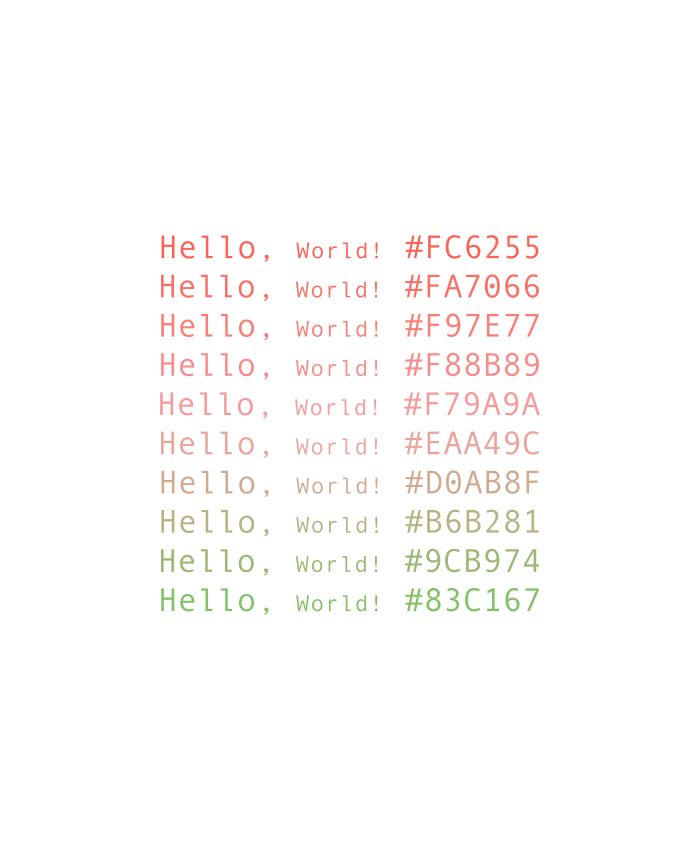

In [233]:
%%manim -v WARNING -ql -r 700,850 -o zap BendTextExample


from manim import *

class BendTextExample(Scene):
    def construct(self):
        self.camera.background_color = WHITE
        # Manim colors
        redsx = [(255-x/2,x,x) for x in range(0,255,32)]
        reds = [rgb_to_color(c) for c in redsx]
        reds = color_gradient([RED, RED_A, GREEN], 10)
        self.add( VGroup(*[MarkupText(f"Hello, <small><small>World!</small></small> {c}" , color = c, font="Andale Mono") for c  in reds]).arrange(DOWN) )


In [12]:
%%manim -v WARNING --disable_caching -ql -r 700,850 -o 05_BrahmandaMovie BrahmandaMandala

class BrahmandaMandala(Scene) :
    
    def play (self, *args, **kwargs) :
        # kwargs['run_time'] = kwargs.get('run_time', 1)*.1
        # args = [ Wait(.5) if type(x) == type(Wait(5)) else x for x in args ]
        super().play(*args, **kwargs)
        
    def construct(self):
        self.camera.background_color = rgb_to_color([0, 0, 0])
        self.camera.background_color = WHITE
        (ayanas, ayanas_u, ayanas_d, visuvats, visuvats_se, visuvats_ae, rtus, naks_shell, naks_text, rashis) =  ( 
            SegmentedRing(elems=G.ayanas     , radius=4-4+5.5, opacity=.02, inner_radius_factor=.89, text_size=30, text_padding=.95, text_color=DARK_BLUE, text_opacity=1, text_sector_fraction=.92), 
            SegmentedRing(elems=G.ayanas_u   , radius=4-4+5.5, opacity=.02, inner_radius_factor=.89, text_size=30, text_padding=.95, text_color=DARK_BLUE, text_opacity=1, text_sector_fraction=.92), 
            SegmentedRing(elems=G.ayanas_d   , radius=4-4+5.5, opacity=.02, inner_radius_factor=.89, text_size=30, text_padding=.95, text_color=DARK_BLUE, text_opacity=1, text_sector_fraction=.92), 
            SegmentedRing(elems=G.visuvats   , radius=4-4+5.5, opacity=.02, inner_radius_factor=.89, text_size=30, text_padding=.95, text_color=DARK_BROWN, text_opacity=1, text_sector_fraction=1, text_wiggle=1), 
            SegmentedRing(elems=G.visuvats_se, radius=4-4+5.5, opacity=.02, inner_radius_factor=.89, text_size=30, text_padding=.95, text_color=DARK_BROWN, text_opacity=1, text_sector_fraction=1, text_wiggle=1), 
            SegmentedRing(elems=G.visuvats_ae, radius=4-4+5.5, opacity=.02, inner_radius_factor=.89, text_size=30, text_padding=.95, text_color=DARK_BROWN, text_opacity=1, text_sector_fraction=1, text_wiggle=1), 
            SegmentedRing(elems=G.rtus, radius=4.8, opacity=.2, inner_radius_factor=.85, text_size=35, text_padding=.92), 
            SegmentedRing(elems=['' for x in G.naks], radius=6.2 , opacity=.2, inner_radius_factor=.9, text_size=25, text_padding=.95, stroke_width=0),
            SegmentedRing(elems=G.naks, radius=6.2 , opacity=0, inner_radius_factor=.9, text_size=25, text_padding=.95),
            SegmentedRing(elems=G.rashis, radius=7 , opacity=.2, inner_radius_factor=.9, text_size=25, text_padding=.95)
        )
        rtus.rotate(PI/6)
        naks_shell.rotate(PI/6)
        naks_text.rotate(PI/6)
        ayanas.rotate(-PI/2)
        ayanas_u.rotate(-PI/2)
        ayanas_d.rotate(-PI/2)
        visuvats.rotate(PI)
        visuvats_se.rotate(PI)
        visuvats_ae.rotate(PI)
        yr = 2000
        

        colors_N = color_gradient(G.color_grad, 19) 
        proxy_sloka = """
                ब्रह्माण्डपुराणम् 21.143-149
                शरद्वसंतयोर्मध्ये मध्यमां गतिमास्थितः । 
                अतस्तुल्यमहोरात्रं करोति तिमिरापहः ॥ 
                कृत्तिकानां यदा सूर्यः प्रथमांशगतो भवेत् । 
                विशाखानां तदा ज्ञेयश्चतुर्थांश निशाकरः ॥
                विशाखानां यदा सूर्यश्चरतेंशं तृतीयकम् । 
                तदा चन्द्रं विजानीयात्कृत्तिकाशिरसि स्थितम् ॥
                """
        t2w_title = {x:BOLD for x in [
            "पराशरतन्त्रम्", "Ādityacāra", "Parāśaratantra", "Seasonal Nakṣatras",
            "आदित्यचारः", "Vṛddha-Gārgīya Jyotiṣa", "Epoch", "वृद्धगार्गीयज्योतिषम्",
            "Ṛtusvabhāva", "ऋतुस्वभावः",  "Brahmāṇḍa Purāṇa", "Equinoctial Full Moon"
        ]}

        t2c_title = {
            'पराशरतन्त्रम्': PURPLE, 'Parāśaratantra': PURPLE,
            'Ādityacāra' : RED, 'अदित्यचारः' : PURPLE,
            "Vṛddha-Gārgīya Jyotiṣa": PURPLE, "वृद्धगार्गीयज्योतिषम्": PURPLE,
            "Ṛtusvabhāva": GREEN, "ऋतुस्वभावः": GREEN,
            "Seasonal Nakṣatras": BLUE , "Epoch": DARK_BROWN,
            "Brahmāṇḍa Purāṇa" : DARK_BLUE, "Equinoctial Full Moon" : PURPLE
        }

        topic_title = VGroup(*[Text(
            x.strip() , font_size=50, color=GRAY, t2c=t2c_title, t2w=t2w_title) 
            for x in
                """
                Epoch of Brahmāṇḍa Purāṇa passages
                using 2 Seasonal Nakṣatras
                and 2 Equinoctial Full Moons
                """.split("\n") if x.strip() != '' ]).arrange(DOWN, buff=.25, center=True)
        self.play(topic_title.animate.shift(UP*6.5), run_time=1)


        words = [ y
            for i,x in enumerate (proxy_sloka.split("\n")) if x.strip() != '' 
            for  y in re.split("\s+|\(|\)", x) if y.strip() != ''
        ]

        # vaidika = [ words[y+1] for x in range(6) for y in [ 7*x, 7*x+1, 7*x+2]]
        # laukika = [ words[y+1] for x in range(6) for y in [ 7*x, 7*x+1+2, 7*x+2+2]]
        # naks = [ words[y+1] for x in range(6) for y in [ 7*x, 7*x+1+4, 7*x+2+4]]

        # t2c_laukika = { x:colors_N[i] for i,x in enumerate(laukika) } 
        # t2c_vaidika = { x:colors_N[i] for i,x in enumerate(vaidika) }
        # t2c_naks = { x:colors_N[i] for i,x in enumerate(naks) }
        # t2w_laukika = {x:BOLD for x in laukika }
        # t2w_vaidika = {x:BOLD for x in vaidika }
        # t2w_naks = {x:BOLD for x in naks }

        t2c_words = { x:colors_N[i % len(colors_N)] for i,x in enumerate(words) }
        t2w_words = {x:BOLD for x in words }
        
        topic_shloka = VGroup(*[Text(
            x, font_size=50, color=BLACK, line_spacing=.5, 
            t2c={**t2c_words},
            t2w={**t2w_words, **t2w_title},
            t2f={ 'पराशरतन्त्रम्': "Consolas", 'आदित्यचारः': "Consolas", "वृद्धगार्गीयज्योतिषम्" : "Consolas", 'ऋतुस्वभावः': "Consolas"}
        ) for x in proxy_sloka.split("\n") if x.strip() != '' ]
        ).arrange(DOWN, buff=.2, center=True).scale(.9).shift(DOWN*1)

        topic_shloka[0].scale(1.2) # title ऋतुस्वभावः

        self.play(FadeIn(topic_shloka), run_time=2)
        self.play(Wait(5))
        self.play(topic_shloka.animate.scale(.5).shift(UP*1.4), run_time=2)

        epoch_label = MarkupText(f"", font_size=60, color=BLACK).shift(UP*0)
        epoch_yr = MarkupText(f"", font_size=60, color=BLACK).shift(DOWN*1)
        epoch_desc = MarkupText(f"", font_size=40, color=BLACK).shift(DOWN*2)
        (ut_m, se_m, dk_m, ae_m) = ( Dot(color=c, radius=.01, fill_opacity=.3).shift(x*naks_shell.radius*.95) for x,c in [
            (UP,RED), (RIGHT, BLUE), (DOWN, PINK), (LEFT, GREEN)])
        self.play ( 
           topic_title.animate.scale(.7).shift(UP*1.1),
            FadeIn (ayanas, rtus, visuvats, 
                epoch_label, epoch_yr, epoch_desc, 
                naks_shell, naks_text, 
                ut_m, se_m, dk_m, ae_m),
                run_time=2
        )
        self.play(*[i[1].animate.scale(.7) for i in rtus.get_items()])
        self.play(Wait(1)) 

        # first 2 lines of the shloka, highlight the equinoxes
        v_items = visuvats.get_items()
        v_se_items = visuvats_se.get_items()
        v_ae_items = visuvats_ae.get_items()

        day_eq_night_text = SegmentedRing(
            elems= ["", "day = night", "", "",  "day = night", "" ],
            radius=visuvats.radius*1 , opacity=0.1, text_color=MAROON,
            inner_radius_factor=.85, text_size=25, text_padding=.95, stroke_width=0).scale(.01)
        
        self.play(
            day_eq_night_text.animate.rotate(PI/6).scale(100),
            ApplyWave(topic_shloka[1]) ,
            ApplyWave(topic_shloka[2]) ,
            v_items[0][1].animate.scale(.7).shift(RIGHT*1.7),
            v_items[1][1].animate.scale(.7).shift(LEFT*1.7),
            run_time=5
        )

        # second 2 lines of the shloka, mark sun at krittika 1/4 and moon at vishakha 3/4
        kv_naks_text = SegmentedRing(
            elems= ["", "कृत्तिका ¼", "", "",  "विशाखा ¾", "" ],
            radius=rtus.radius*1 , opacity=0.1*0, text_color=MAROON,
            inner_radius_factor=.85, text_size=25, text_padding=.75, stroke_width=0).scale(.01)

        sun_moon_text = SegmentedRing(
            elems= ["", "सूर्यः", "", "",  "चन्द्रः", "" ],
            radius=rtus.radius*.85 , opacity=0, text_color=PURPLE,
            inner_radius_factor=.85, text_size=25, text_padding=.75, stroke_width=0).scale(.01)
        
        self.play(
            kv_naks_text.animate.rotate(PI/6).scale(100),
            sun_moon_text.animate.rotate(PI/6).scale(100),
            ApplyWave(topic_shloka[3]) ,
            ApplyWave(topic_shloka[4]) ,
            run_time=5
        )

        # last 2 lines of the shloka, mark moon at krittika 1/4 and sun at vishakha 3/4
        self.play(
            sun_moon_text.animate.rotate(PI),
            ApplyWave(topic_shloka[5]) ,
            ApplyWave(topic_shloka[6]) ,
            run_time=5
        )

        # second 2 lines again
        self.play(
            sun_moon_text.animate.rotate(PI),
            ApplyWave(topic_shloka[5-2]) ,
            ApplyWave(topic_shloka[6-2]) ,
            run_time=5
        )

        self.play(topic_shloka.animate.shift(UP*1.5).scale(.9), run_time=2)
        self.play(Indicate(kv_naks_text, run_time=2, scale_factor=1, color=RED, rate_func=there_and_back))

       # create a horizon line below the naks_shell
        horizon_line = Line(
            start=naks_shell.get_bottom()+ 1.0*DOWN + LEFT*naks_shell.radius, 
            end=naks_shell.get_bottom()+ 1.0*DOWN + RIGHT*naks_shell.radius,
            stroke_width=2,
            color=BLACK
        )
        # Let the left end be -2000 and right end be 2000
        # place ticks at -2000, -1000, 0, 1000, 2000
        ticks = [ Line(
            start=horizon_line.get_center() + .1*DOWN + RIGHT*x*naks_shell.radius,
            end=horizon_line.get_center() - .1*DOWN + RIGHT*x*naks_shell.radius, 
            stroke_width=2, color=BLACK) for x in [-1, -.5, 0, .5, 1] 
        ]
        tick_labels = [ 
            MarkupText(f"{abs(x)} BCE" if x < 0 else f"{x} CE",
                       font_size=25, color=GREEN if x<0 else BLUE).next_to(ticks[i], .5*DOWN) 
                       for i,x in enumerate([-2000, -1000, 0, 1000, 2000]) 
        ]
        self.add(horizon_line, *ticks, *tick_labels)

        # create a pink dot at the right end of the horizon line
        horizon_object= Dot(color=RED, radius=.2, fill_opacity=1, stroke_width=0)
        horizon_object.move_to(horizon_line.get_right())
        self.add(horizon_object)

        epochs = [
            ( 2000 ,  'Current Epoch',   'Too Distant', ),
            ( 1500 ,  '500 years ago',   'Too Distant', ),
            ( 1000 ,  '1000 years ago',  'Too Distant', ),
            ( 500 ,   '1500 years ago',  'Too Distant', ),
            ( 0 ,     '2000 years ago',  'Too Distant', ),
            ( -500 ,  '2500 years ago',  'Too Distant',  ),
            ( -1000 ,  '3000 years ago',  'Getting Closer',  ),
            ( -1500 ,  '3500 years ago',  'Getting Closer',  ),
            ( -2000 ,  '4000 years ago',  'Over Shot',  ),
            ( -1800 ,  '3800 years ago',  'Good Fit',  ),
        ]

        status_circle = Circle(radius=4.1, color=RED, fill_opacity=.15, stroke_width=.1)
        init_year = prev_yr = 2001
        for  (yr, label, desc), color in zip(epochs, color_gradient([RED, RED_C, GOLD, GREEN], len(epochs))) :
            # label = ""
            # desc = ""
            rot_radians = -(yr-init_year)*2*PI/25500
            rot_idx = 27*rot_radians/(2*PI)
            (u, s, d, a) = [ round(rot_idx - 4 - 27*i/4)%27 for i in [0, 1, 2, 3]]
            (ut, se, dk, ae) = [naks_text.elems[x] for x in [u, s, d, a]]

            self.play(
                naks_text.animate.rotate(-(yr-prev_yr)*2*PI/25500),
                status_circle.animate.set_color(color),
                *[i[1].animate.set_color(color) for i in kv_naks_text.get_items()],
                Transform(epoch_label, MarkupText(f"{label}", font_size=60, color=color).shift(DOWN*1), run_time=1),
                Transform(epoch_yr, 
                            MarkupText(
                                f"<b>{abs(yr):5d} {' BCE' if yr<0 else ' CE'}</b>" 
                                + (f"<small><small>(±100 years)</small></small>" if color==GREEN else "") 
                            , font_size=60, color=color).shift(DOWN*2), run_time=1),
                Transform(epoch_desc, MarkupText(f"{desc}", font_size=35, color=color).shift(DOWN*3), run_time=1),
                # ApplyWave(epoch_yr, amplitude=0.5, run_time=1 if prev_yr != yr else 0),
                horizon_object.animate.move_to(horizon_line.get_right() + RIGHT*(yr-init_year)*horizon_line.get_length()/4000),
            )
            self.play(
                Indicate(kv_naks_text, run_time=4 if color==GREEN else 1 , scale_factor=1.8, color=color, 
                         rate_func=there_and_back_with_pause if color==GREEN else there_and_back_with_pause),
                horizon_object.animate.set_color(color),
                Wait(5 if color==GREEN else 2)
            )
            if (color == GREEN) : 
                self.play(
                    kv_naks_text.copy().animate.scale(1.8 if color==GREEN else 1), 
                ),
                self.play(
                    *[ApplyWave(x, amplitude=1, run_time=2) for x in [epoch_desc] ]
                )
                self.play(
                    *[ApplyWave(x, amplitude=2, run_time=3) for x in [topic_title[0:2], epoch_yr] ]
                )
            prev_yr = yr

        self.play( Wait(5))



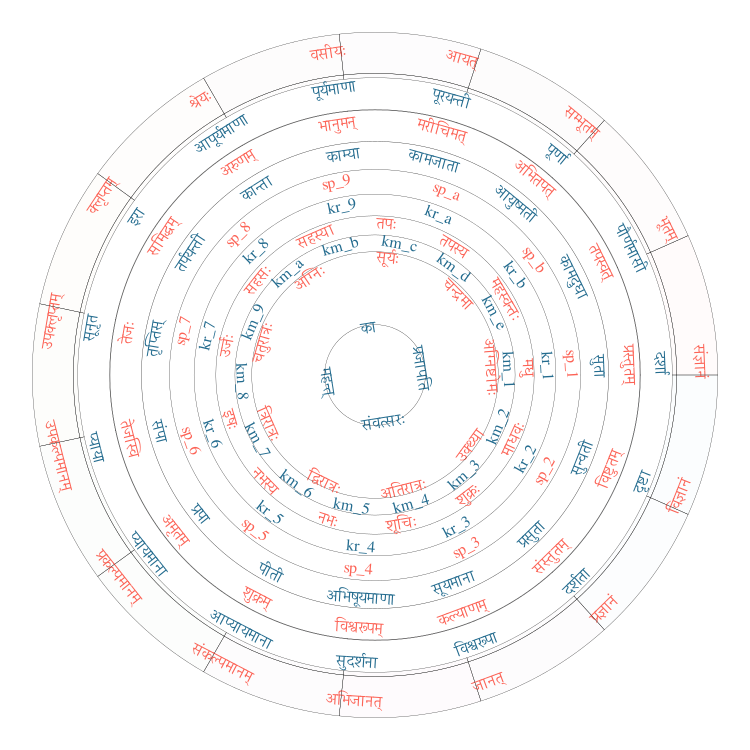

In [143]:
%%manim -v WARNING --disable_caching -ql -r 750,750 -o 80_SavitraCayana SavitraCayana

class SavitraCayana(Scene) :
    
    # /Users/sunder/projects/sanchaya/Vedic texts/YV/TB viswara.txt
    # 3431,56:303: प्रपाठक: 10 अनुवाक 1 सावित्रचयनम् VERSE: 1 { 3.10.1.1} संज्ञानं विज्ञानं प्रज्ञानं जानदभिजानत् । संकल्पमानं प्रकल्पमानमुपकल्पमानमुपक्लृप्तं क्लृप्तम् । श्रेयो वसीय आयत् सम्भूतं भूतम् । चित्रः केतुः प्रभानाभान्त् संभान् । ज्योतिष्मांस् तेजस्वानातपंस् तपन्नभितपन् । रोचनो रोचमानः शोभनः शोभमानः कल्याणः । दर्शा दृष्टा दर्शता विश्वरूपा सुदर्शना । आप्यायमाना प्यायमाना प्याया सूनृतेरा । आपूर्यमाणा पूर्यमाणा पूरयन्ती पूर्णा पौर्णमासी । दाता प्रदाता_आनन्दो मोदः प्रमोदः ।
    c9_sukla_days = [ f"{x:5s}" for x in "संज्ञानं विज्ञानं प्रज्ञानं जानत् अभिजानत् संकल्पमानम् प्रकल्पमानम् उपकल्पमानम् उपक्लृप्तम् क्लृप्तम् श्रेयः वसीयः आयत् सम्भूतम् भूतम्".split(" ")]
    c8_sukla_nights = [ f"{x:5s}" for x in "दर्शा दृष्टा दर्शता विश्वरूपा सुदर्शना आप्यायमाना प्यायमाना प्याया सूनृत इरा आपूर्यमाणा पूर्यमाणा पूरयन्ती पूर्णा पौर्णमासी".split(" ")]

    #/Users/sunder/projects/sanchaya/Vedic texts/YV/TB viswara.txt
    #3433,106:346: VERSE: 2 { 3.10.1.2} आवेशयन् निवेशयन्त् संवेशनः संशान्तः शान्तः । आभवन् प्रभवन्त् संभवन्त् संभूतो भूतः । प्रस्तुतं विष्टुतं संस्तुतं कल्याणं विश्वरूपम् । शुक्रममृतं तेजस्वि तेजः समिद्धम् । अरुणं भानुमन् मरीचिमदभितपत् तपस्वत् । सविता प्रसविता दीप्तो दीपयन् दीप्यमानः । ज्वलञ् ज्वलिता तपन् वितपन्त् संतपन् । रोचनो रोचमानः शुम्भूः शुम्भमानो वामः । सुता सुन्वती प्रसुता सूयमाना_अभिषूयमाणा । पीती प्रपा संपा तृप्तिस् तर्पयन्ती ।
    # .            VERSE: 3 { 3.10.1.3} कान्ता काम्या कामजाता_आयुष्मती कामदुघा । अभिशास्ता_अनुमन्ता_आनन्दो मोदः प्रमोदः । आसादयन् निषादयन्त् संसादनः संसन्नः सन्नः । आभूर्वाभूः प्रभूः शम्भूर् भुवः । पवित्रं पवियिष्यन् पूतो मेध्यः । यशो यशस्वानायुरमृतः । जीवो जीविष्यन्त् स्वर्गो लोकः । सहस्वान्त् सहीयान् ओजस्वान्त् सहमानः । जयन्नभिजयन्त् सुद्रविणो द्रविणोदाः । आर्द्रपवित्रो हरिकेशो मोदः प्रमोदः ।
    c7_krsna_days = [ f"{x:5s}" for x in "प्रस्तुतम् विष्टुतम् संस्तुतम् कल्याणम् विश्वरूपम् शुक्रम् अमृतम् तेजस्वि तेजः समिद्धम् अरुणम् भानुमन् मरीचिमत् अभितपत् तपस्वत्".split(" ")]
    c6_krsna_nights = [ f"{x:5s}" for x in "सुता सुन्वती प्रसुता सूयमाना अभिषूयमाणा पीती प्रपा संपा तृप्तिस् तर्पयन्ती कान्ता काम्या कामजाता आयुष्मती कामदुघा".split(" ")]

    c5_sukla_paksas = [ f"sp_{x:x}" for x in range(1,12)]
    c4_krsna_paksas = [ f"kr_{x:x}" for x in range(1,12)]
    c3_rtu_maasas = G.vaidika_maasas + ['महस्वन्तः']
    c2_ksudra_muhoortas = [ f"km_{x:x}" for x in range(1,15)]
    c1_kratus = [ f"{x:5s}" for x in "अग्निष्टोमः उक्थ्या अतिरात्रः द्विरात्रः त्रिरात्रः चतुरात्रः अग्निः सूर्यः चन्द्रमा".split(" ") ]
    c0_years = [ "प्रजापति", "संवत्सरः", "महन्त्", "का"]

    # /Users/sunder/projects/sanchaya/Vedic texts/YV/TB viswara.txt

    def play (self, *args, **kwargs) :
        # kwargs['run_time'] = kwargs.get('run_time', 1)*.1
        # args = [ Wait(.5) if type(x) == type(Wait(5)) else x for x in args ]
        super().play(*args, **kwargs)

    def construct(self):
        self.camera.background_color = rgb_to_color([0, 0, 0])
        self.camera.background_color = WHITE
        R9 = 6.5   ;  DELTA = .12;
        (c9, c8, c7 , c6, c5, c4, c3, c2, c1, c0 ) =  ( 
            SegmentedRing(elems=self.c9_sukla_days    , radius=R9*((1-DELTA)**0), opacity=.02, inner_radius_factor=1-DELTA**1, text_size=22, text_padding=1-.048, text_color=RED,       text_opacity=1, text_sector_fraction=0.1), 
            SegmentedRing(elems=self.c8_sukla_nights  , radius=R9*((1-DELTA)**1), opacity=.02, inner_radius_factor=1-DELTA**2, text_size=22, text_padding=1-.048, text_color=DARK_BLUE, text_opacity=1, text_sector_fraction=0.1), 
            SegmentedRing(elems=self.c7_krsna_days    , radius=R9*((1-DELTA)**2), opacity=.02, inner_radius_factor=1-DELTA**3, text_size=22, text_padding=1-.048, text_color=RED,       text_opacity=1, text_sector_fraction=0.1), 
            SegmentedRing(elems=self.c6_krsna_nights  , radius=R9*((1-DELTA)**3), opacity=.02, inner_radius_factor=1-DELTA**4, text_size=22, text_padding=1-.048, text_color=DARK_BLUE, text_opacity=1, text_sector_fraction=0.1), 
            SegmentedRing(elems=self.c5_sukla_paksas  , radius=R9*((1-DELTA)**4), opacity=.02, inner_radius_factor=1-DELTA**5, text_size=22, text_padding=1-.048, text_color=RED,       text_opacity=1, text_sector_fraction=0.1), 
            SegmentedRing(elems=self.c4_krsna_paksas  , radius=R9*((1-DELTA)**5), opacity=.02, inner_radius_factor=1-DELTA**6, text_size=22, text_padding=1-.048, text_color=DARK_BLUE, text_opacity=1, text_sector_fraction=0.1), 
            SegmentedRing(elems=self.c3_rtu_maasas    , radius=R9*((1-DELTA)**6), opacity=.02, inner_radius_factor=1-DELTA**7, text_size=22, text_padding=1-.048, text_color=RED,       text_opacity=1, text_sector_fraction=0.1), 
            SegmentedRing(elems=self.c2_ksudra_muhoortas   , radius=R9*((1-DELTA)**7), opacity=.02, inner_radius_factor=1-DELTA**8, text_size=22, text_padding=1-.048, text_color=DARK_BLUE,       text_opacity=1, text_sector_fraction=0.1), 
            SegmentedRing(elems=self.c1_kratus        , radius=R9*((1-DELTA)**8), opacity=.02, inner_radius_factor=1-DELTA**9, text_size=22, text_padding=1-.048, text_color=RED,       text_opacity=1, text_sector_fraction=0.1), 
            SegmentedRing(elems=self.c0_years         , radius=R9*((1-DELTA)**15), opacity=.02, inner_radius_factor=1-DELTA**10, text_size=22, text_padding=1-.048, text_color=DARK_BLUE, text_opacity=1, text_sector_fraction=0.1), 

            # SegmentedRing(elems=G.visuvats   , radius=4-4+5.5, opacity=.02, inner_radius_factor=.89, text_size=30, text_padding=.95, text_color=DARK_BROWN, text_opacity=1, text_sector_fraction=1, text_wiggle=1), 
            # SegmentedRing(elems=G.visuvats_se, radius=4-4+5.5, opacity=.02, inner_radius_factor=.89, text_size=30, text_padding=.95, text_color=DARK_BROWN, text_opacity=1, text_sector_fraction=1, text_wiggle=1), 
            # SegmentedRing(elems=G.visuvats_ae, radius=4-4+5.5, opacity=.02, inner_radius_factor=.89, text_size=30, text_padding=.95, text_color=DARK_BROWN, text_opacity=1, text_sector_fraction=1, text_wiggle=1), 
            # SegmentedRing(elems=G.rtus, radius=4.8, opacity=.2, inner_radius_factor=.85, text_size=35, text_padding=.92), 
            # SegmentedRing(elems=['' for x in G.naks], radius=6.2 , opacity=.2, inner_radius_factor=.9, text_size=25, text_padding=.95, stroke_width=0),
            # SegmentedRing(elems=G.naks, radius=6.2 , opacity=0, inner_radius_factor=.9, text_size=25, text_padding=.95),
            # SegmentedRing(elems=G.rashis, radius=7 , opacity=.2, inner_radius_factor=.9, text_size=25, text_padding=.95)
        )
        # ayanas.rotate(-PI/2)
 

        for x in [c9, c8, c7, c6, c5, c4, c3, c2, c1, c0 ][0:]:
            self.add(x)

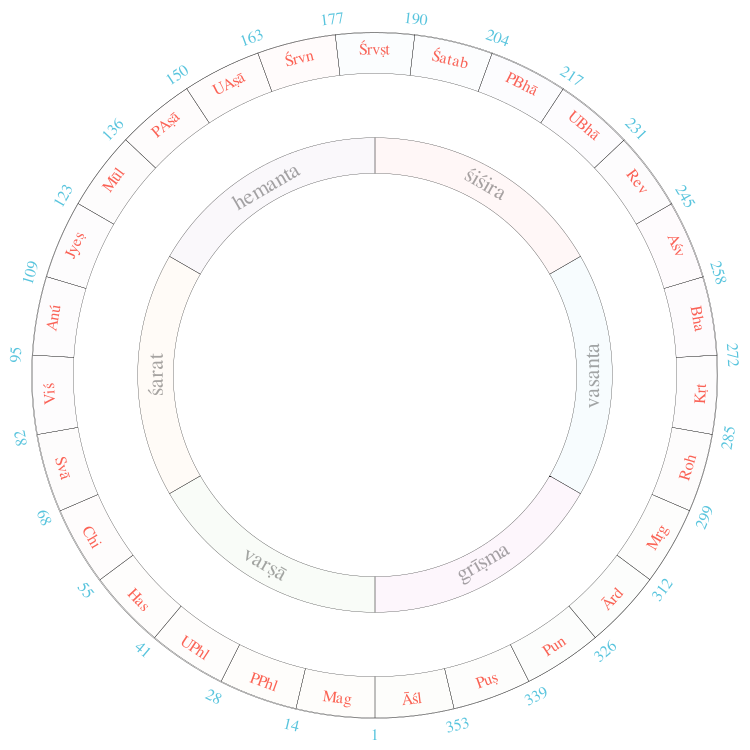

In [246]:
%%manim -v WARNING --disable_caching -ql -r 750,750 -o 81_MahasalilaNaksMala MahasalilaNaksMala
from math import floor

class MahasalilaNaksMala (Scene) :
    

    #/Users/sunder/projects/sanchaya/Vedic texts/YV/TB viswara.txt
    #3433,106:346: VERSE: 2 { 3.10.1.2} आवेशयन् निवेशयन्त् संवेशनः संशान्तः शान्तः । आभवन् प्रभवन्त् संभवन्त् संभूतो भूतः । प्रस्तुतं विष्टुतं संस्तुतं कल्याणं विश्वरूपम् । शुक्रममृतं तेजस्वि तेजः समिद्धम् । अरुणं भानुमन् मरीचिमदभितपत् तपस्वत् । सविता प्रसविता दीप्तो दीपयन् दीप्यमानः । ज्वलञ् ज्वलिता तपन् वितपन्त् संतपन् । रोचनो रोचमानः शुम्भूः शुम्भमानो वामः । सुता सुन्वती प्रसुता सूयमाना_अभिषूयमाणा । पीती प्रपा संपा तृप्तिस् तर्पयन्ती ।
    # .            VERSE: 3 { 3.10.1.3} कान्ता काम्या कामजाता_आयुष्मती कामदुघा । अभिशास्ता_अनुमन्ता_आनन्दो मोदः प्रमोदः । आसादयन् निषादयन्त् संसादनः संसन्नः सन्नः । आभूर्वाभूः प्रभूः शम्भूर् भुवः । पवित्रं पवियिष्यन् पूतो मेध्यः । यशो यशस्वानायुरमृतः । जीवो जीविष्यन्त् स्वर्गो लोकः । सहस्वान्त् सहीयान् ओजस्वान्त् सहमानः । जयन्नभिजयन्त् सुद्रविणो द्रविणोदाः । आर्द्रपवित्रो हरिकेशो मोदः प्रमोदः ।
    c7_krsna_days = [ f"{x:5s}" for x in "प्रस्तुतम् विष्टुतम् संस्तुतम् कल्याणम् विश्वरूपम् शुक्रम् अमृतम् तेजस्वि तेजः समिद्धम् अरुणम् भानुमन् मरीचिमत् अभितपत् तपस्वत्".split(" ")]
    c6_krsna_nights = [ f"{x:5s}" for x in "सुता सुन्वती प्रसुता सूयमाना अभिषूयमाणा पीती प्रपा संपा तृप्तिस् तर्पयन्ती कान्ता काम्या कामजाता आयुष्मती कामदुघा".split(" ")]

    c5_sukla_paksas = [ f"sp_{x:x}" for x in range(1,12)]
    c4_krsna_paksas = [ f"kr_{x:x}" for x in range(1,12)]
    c3_rtu_maasas = G.vaidika_maasas + ['महस्वन्तः']
    c2_ksudra_muhoortas = [ f"km_{x:x}" for x in range(1,15)]
    c1_kratus = [ f"{x:5s}" for x in "अग्निष्टोमः उक्थ्या अतिरात्रः द्विरात्रः त्रिरात्रः चतुरात्रः अग्निः सूर्यः चन्द्रमा".split(" ") ]
    c0_years = [ "प्रजापति", "संवत्सरः", "महन्त्", "का"]

    # /Users/sunder/projects/sanchaya/Vedic texts/YV/TB viswara.txt

    def play (self, *args, **kwargs) :
        # kwargs['run_time'] = kwargs.get('run_time', 1)*.1
        # args = [ Wait(.5) if type(x) == type(Wait(5)) else x for x in args ]
        super().play(*args, **kwargs)

    def construct(self):
        self.camera.background_color = rgb_to_color([0, 0, 0])
        self.camera.background_color = WHITE
        R9 = 6.5   ;  DELTA = .12;
        day_nums = [ f"{floor(x*(13+5/9)+1)}" for x in range(0,27)]
        (cnaks, cday_nums, crtus) =  ( 
            SegmentedRing( elems=G.enaks               , radius=R9*((1-DELTA)**0), opacity=.02, inner_radius_factor=1-DELTA**1, text_size=22, text_padding=1-.048*1, text_color=RED,       text_opacity=1, text_sector_fraction=-0.1*5), 
            SegmentedRing( elems=day_nums              , radius=R9*((1-DELTA)**0), opacity=.02, inner_radius_factor=1-0*DELTA**1, text_size=22, text_padding=1+.048*1, text_color=BLUE,      text_opacity=1, text_sector_fraction=-0.1*5), 
            SegmentedRing( elems=G.ertus, radius=4.5, opacity=.05, text_opacity=.35, inner_radius_factor=.85, text_size=30, text_padding=.92, text_color=BLACK,), 
        )

        for x in [cnaks ][0:]:
            x.rotate(PI/2+PI/27) 
            for n in range(0,7) : x.rotate_text_by_name(G.enaks[n], PI) #  श्रविष्ठा, शतभिषा, पूर्वभाद्रपदा, उत्तरभाद्रपदा, रेवती, अश्विनी, भरणी
            for n in range(13,13+7) : x.rotate_text_by_name(G.enaks[n], PI) #  आश्लेषा, मघा, पूर्वफाल्गुनी, उत्तरफाल्गुनी, हस्ता, चित्रा, स्वाती   

        for x in [cday_nums ][0:]:
            x.rotate(-PI/2+PI/27) 
            for n in range(0+6,7+6) : x.rotate_text_by_name(day_nums[n], PI) #  श्रविष्ठा, शतभिषा, पूर्वभाद्रपदा, उत्तरभाद्रपदा, रेवती, अश्विनी, भरणी
            for n in range(-1,-7,-1) : x.rotate_text_by_name(day_nums[n], PI) #  आश्लेषा, मघा, पूर्वफाल्गुनी, उत्तरफाल्गुनी, हस्ता, चित्रा, स्वाती   

        for x in [crtus ][0:]:
            x.rotate(PI/6) 

 
        for x in [cnaks, cday_nums, crtus ][0:]:
            self.add(x)